In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

### Descarga de datos + Checkeo 

In [2]:
# descarga datos

data = pd.read_csv('houseprice.csv', sep = ';', decimal = ',')

In [3]:
#check de los datos 

data.shape

data.head()
data.tail()


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,1.670812e+09,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,1.647888e+09,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,2.192224e+09,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,1.849243e+09,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,1.877419e+09,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   SalePrice      1459 non-null   float64
 2   MSSubClass     1459 non-null   int64  
 3   MSZoning       1455 non-null   object 
 4   LotFrontage    1232 non-null   float64
 5   LotArea        1459 non-null   int64  
 6   Street         1459 non-null   object 
 7   Alley          107 non-null    object 
 8   LotShape       1459 non-null   object 
 9   LandContour    1459 non-null   object 
 10  Utilities      1457 non-null   object 
 11  LotConfig      1459 non-null   object 
 12  LandSlope      1459 non-null   object 
 13  Neighborhood   1459 non-null   object 
 14  Condition1     1459 non-null   object 
 15  Condition2     1459 non-null   object 
 16  BldgType       1459 non-null   object 
 17  HouseStyle     1459 non-null   object 
 18  OverallQ

In [5]:

# nombres de las variables
variables = set(data.columns.values)


categoricas = set(data.columns[data.dtypes == object])

numericas = set(data.columns) - categoricas

categoricas = list(categoricas)
numericas = list(numericas)

print(len(categoricas))
print(len(numericas))

43
38


In [6]:
# Comprobamos que la variable ID es el identificador de caso para descartarla.
print('Número de etiquetas en el ID: ', len(data.Id.unique()))
print('Número de casas: ', len(data))

Número de etiquetas en el ID:  1459
Número de casas:  1459


### Valores faltantes

In [7]:
pd.set_option("display.max_rows",data.shape[1] )

In [8]:
valores_faltantes = data.columns[data.isnull().any()].tolist()
valores_faltantes 

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functiol',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [9]:
print(data[valores_faltantes].isnull().sum())

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functiol           2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


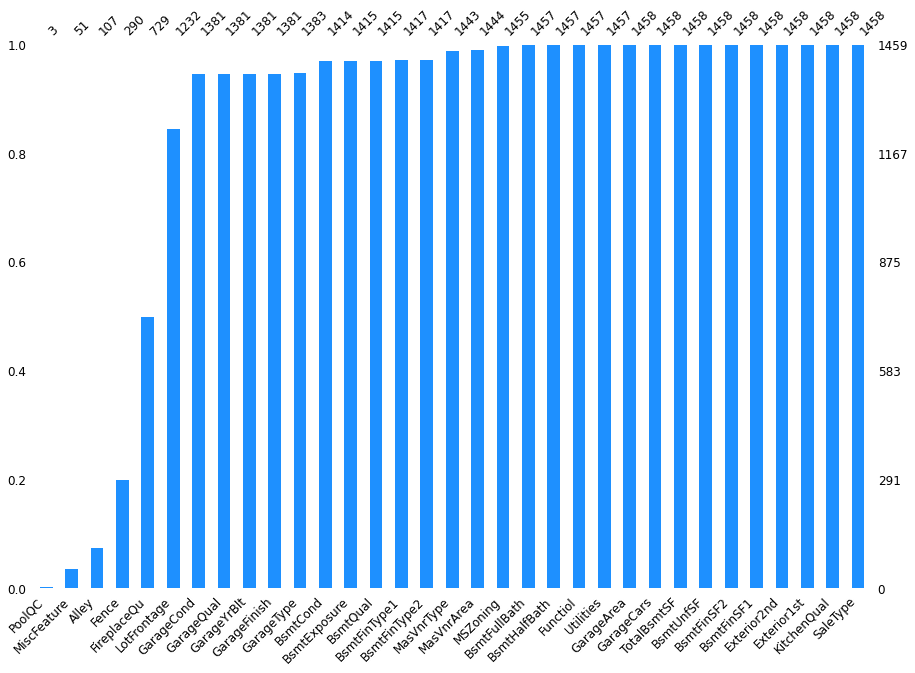

In [10]:
missingno.bar(data[valores_faltantes],color="dodgerblue", sort="ascending", figsize=(15,10), fontsize=12)

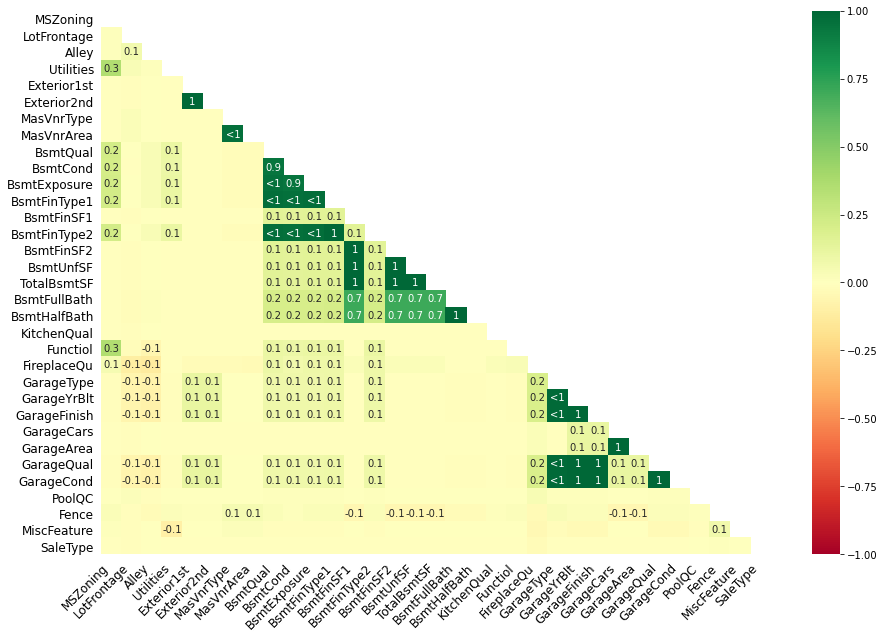

In [11]:
missingno.heatmap(data[valores_faltantes], cmap="RdYlGn", figsize=(15,10), fontsize=12)

Impacto potencial de los datos faltantes sobre la predicción del target.

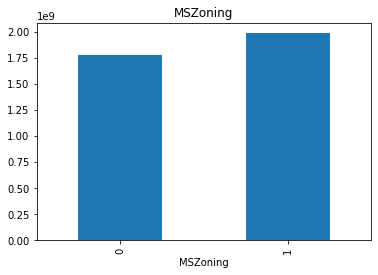

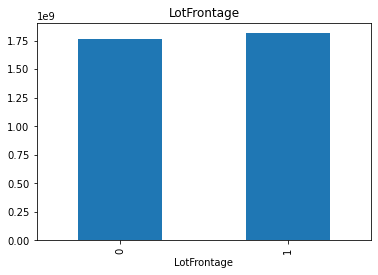

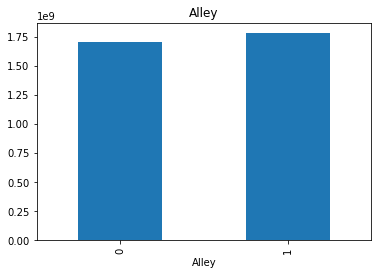

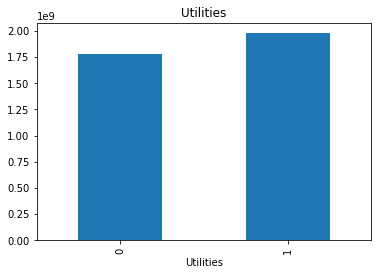

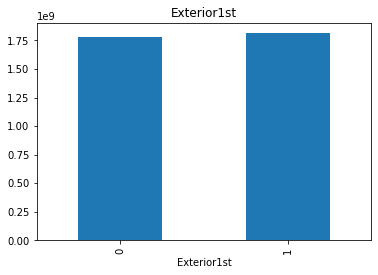

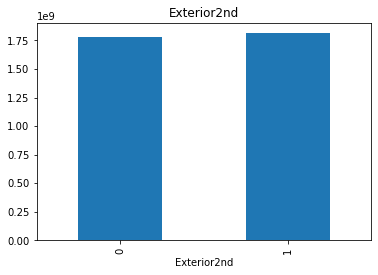

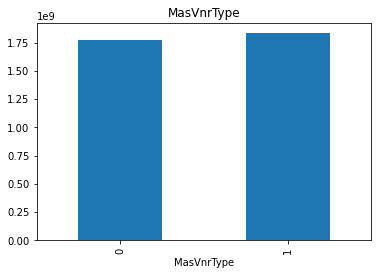

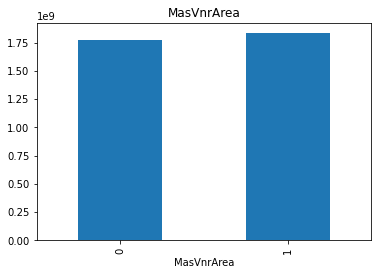

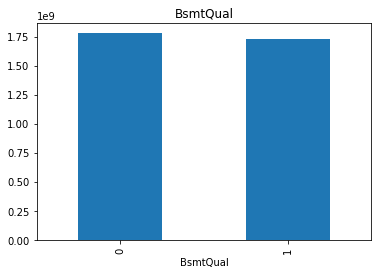

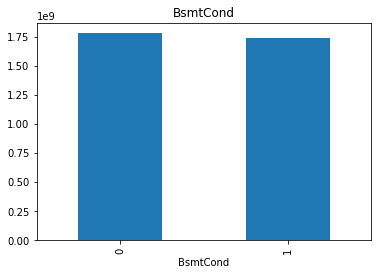

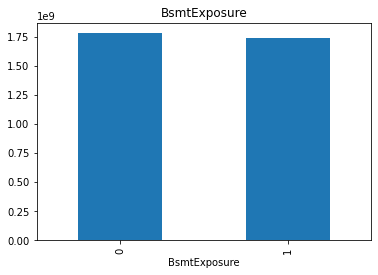

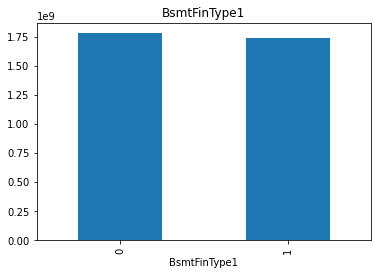

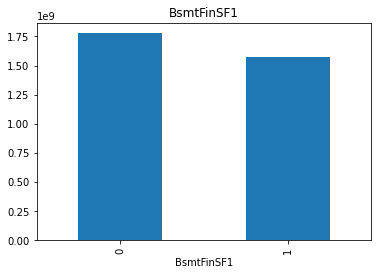

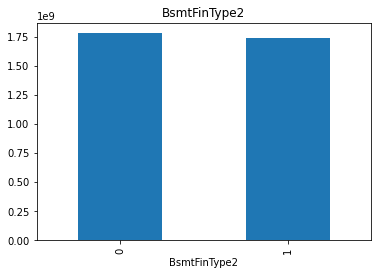

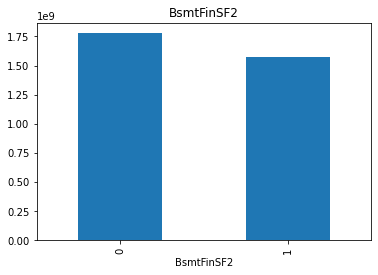

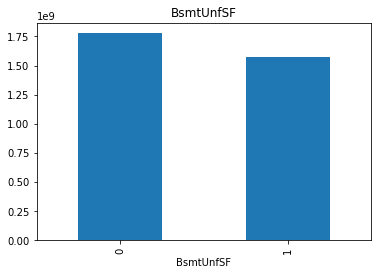

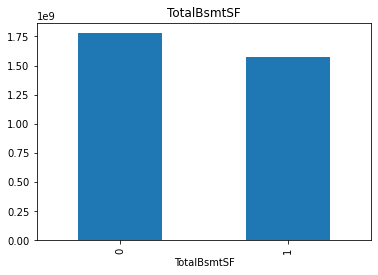

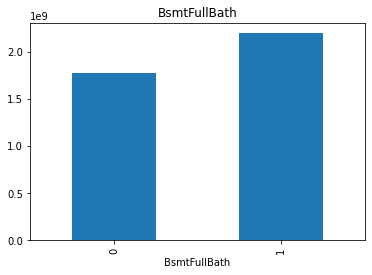

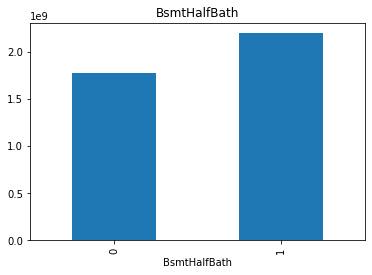

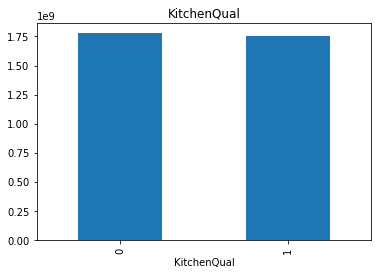

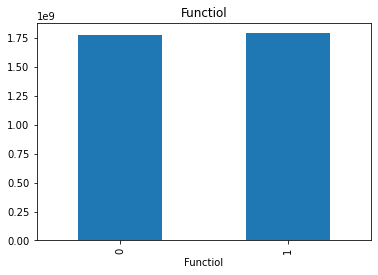

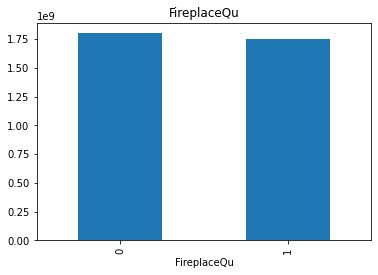

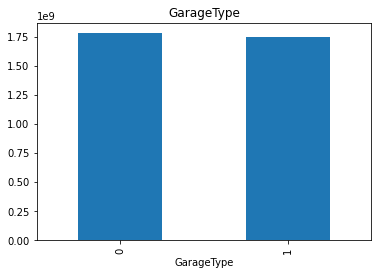

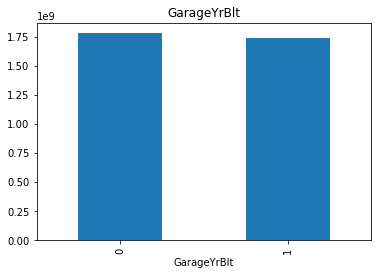

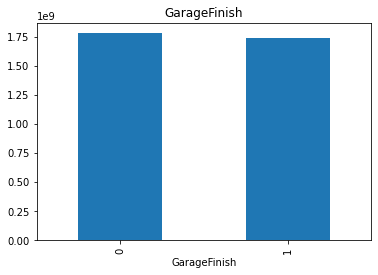

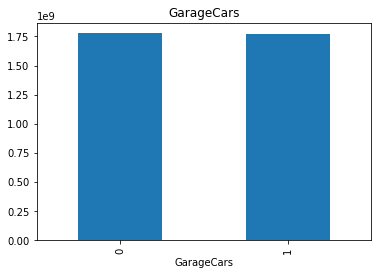

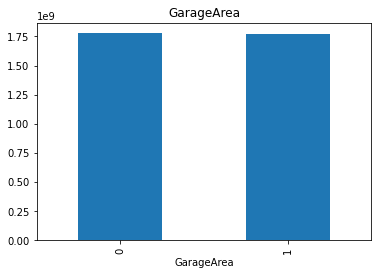

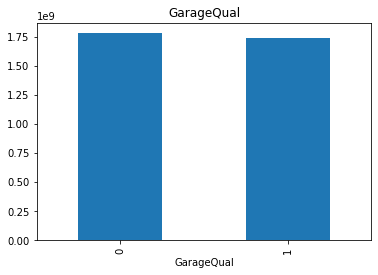

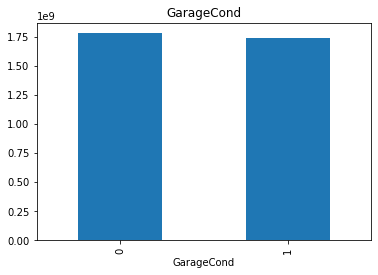

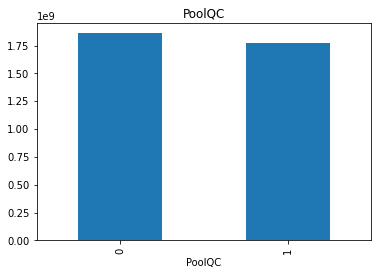

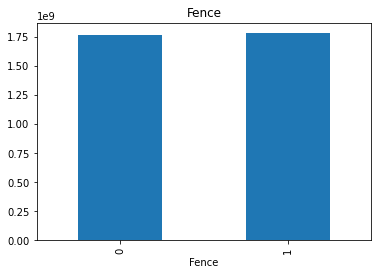

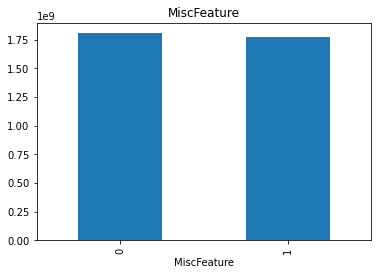

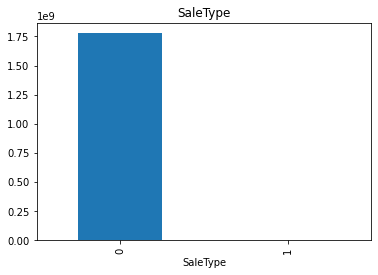

In [12]:
def analyse_na_value(df, var):

    df = df.copy()

    # Variable dicotómica; 1= missing.
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparación de ma ledia del precio de venta entre los casos faltantes y no faltantes.
    df.groupby(var)['SalePrice'].median().plot.bar()

    plt.title(var)
    plt.show()


# ejecutamos la función en todas las variables que tienen datos faltantes.
for var in valores_faltantes:
    
    analyse_na_value(data, var)

### Exploración gráfica

#### 1. Target

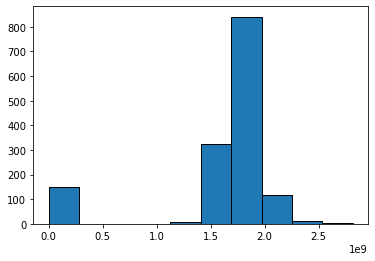

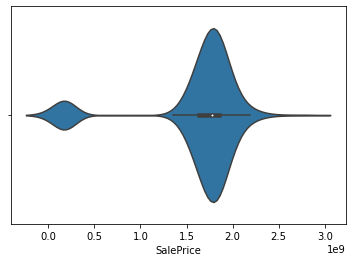

In [13]:
plt.hist(data.SalePrice, edgecolor='black')
plt.show()


sns.violinplot(data.SalePrice)
plt.show()


In [14]:
rdo = data.SalePrice.describe()
rdo

count    1.459000e+03
mean     1.623874e+09
std      5.220746e+08
min      1.507301e+05
25%      1.634315e+09
50%      1.776682e+09
75%      1.855991e+09
max      2.816440e+09
Name: SalePrice, dtype: float64

In [15]:
data['SalePrice_log'] = np.log(data['SalePrice'])

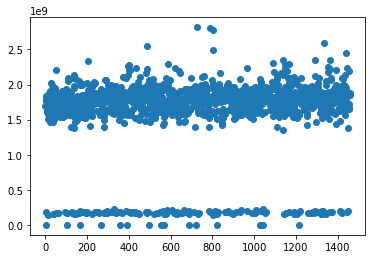

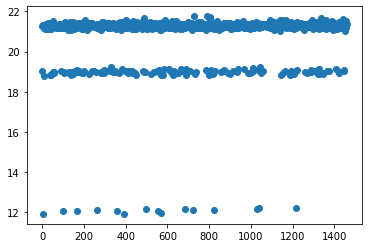

In [16]:
plt.scatter(data.index, data['SalePrice'])
plt.show()


plt.scatter(data.index, data['SalePrice_log'])
plt.show()

#### Identificamos outliers y valores extremos

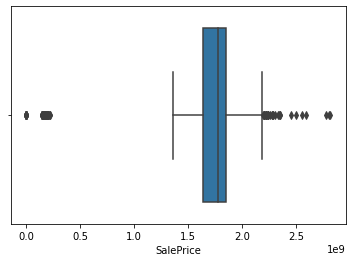

In [17]:
sns.boxplot(data.SalePrice)
plt.show()

In [18]:
IRQ = rdo[6]-rdo[4]

In [19]:
data[data['SalePrice']< (rdo[4]-1.5*IRQ)]['SalePrice'].count()

151

In [20]:
data[data['SalePrice']< (rdo[4]-3*IRQ)]['SalePrice'].count()

151

In [21]:
data[data['SalePrice']> (rdo[6]+1.5*IRQ)]['SalePrice'].count()

30

In [22]:
data[data['SalePrice']> (rdo[6]+3*IRQ)]['SalePrice'].count()

5

### Gráficos de las variables

1. variables numericas

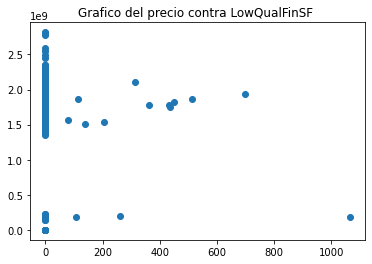

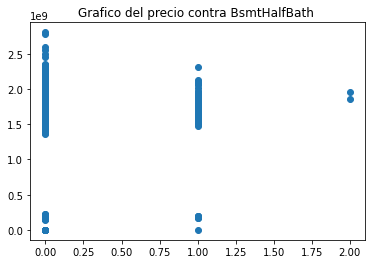

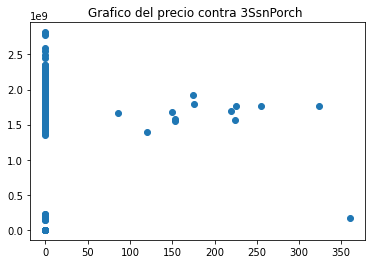

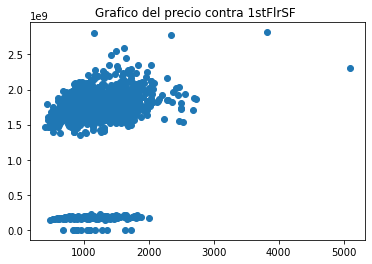

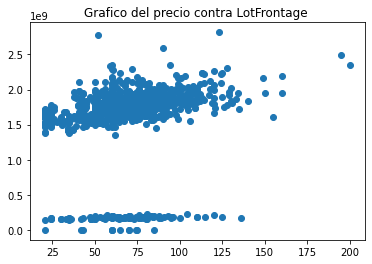

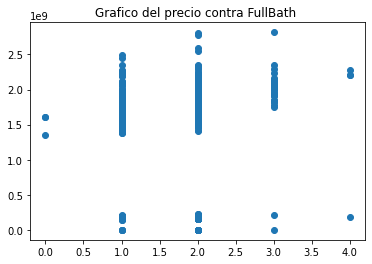

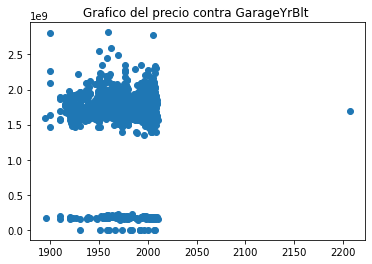

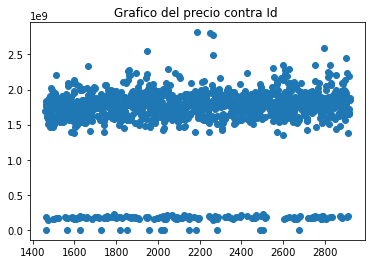

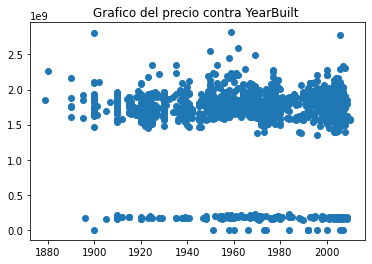

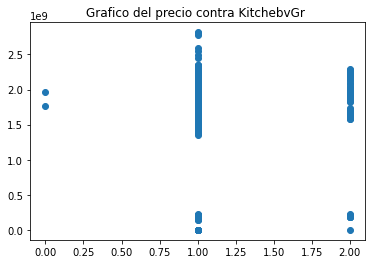

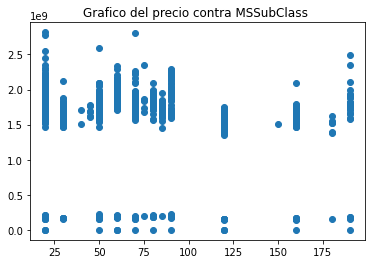

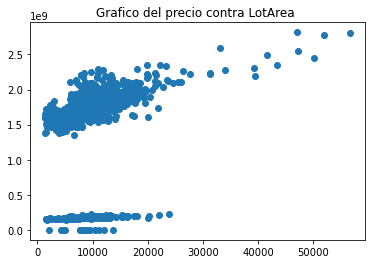

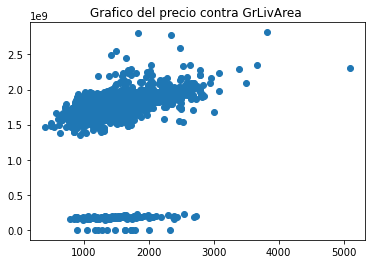

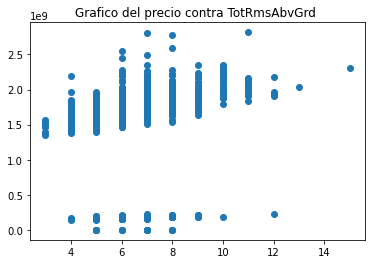

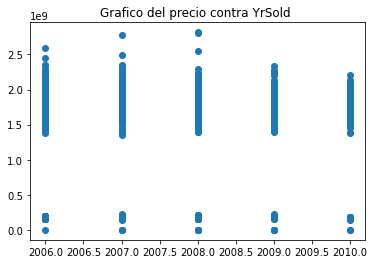

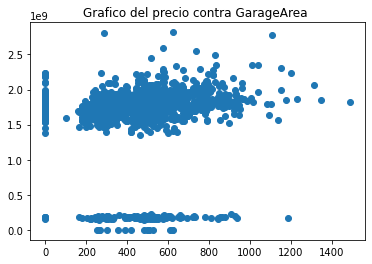

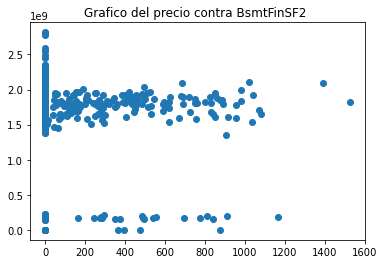

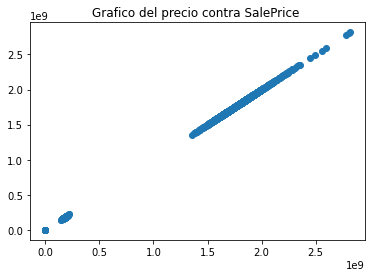

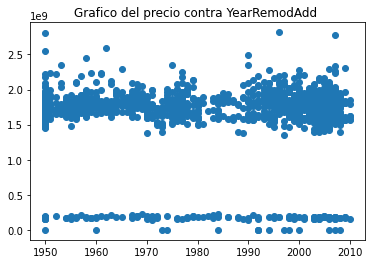

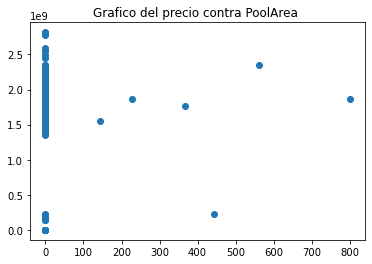

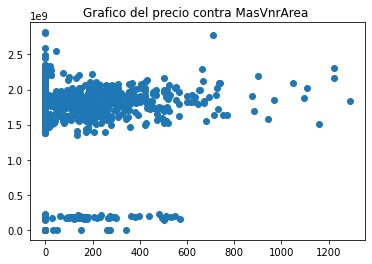

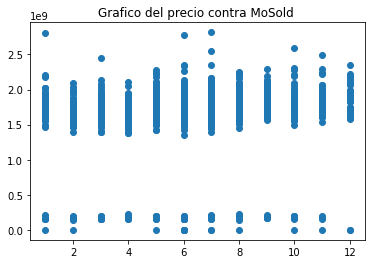

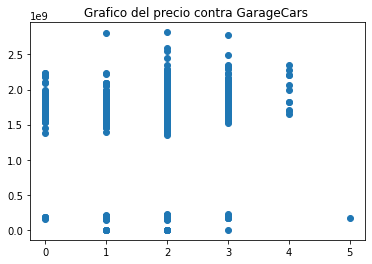

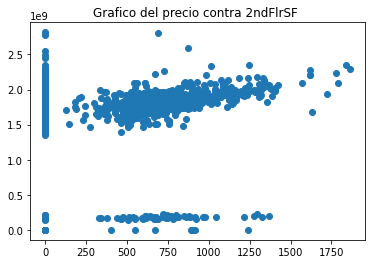

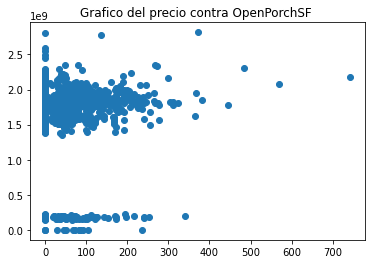

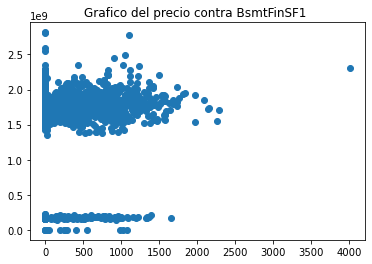

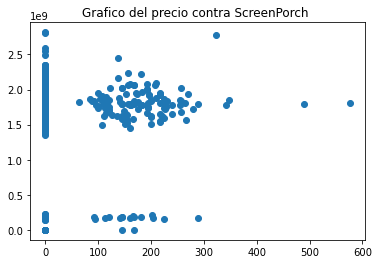

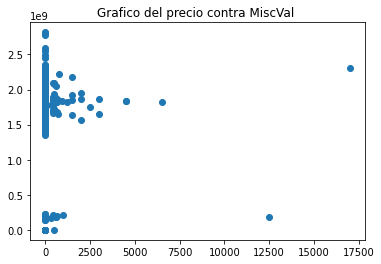

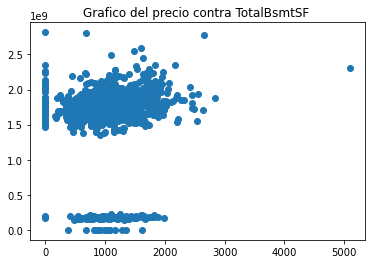

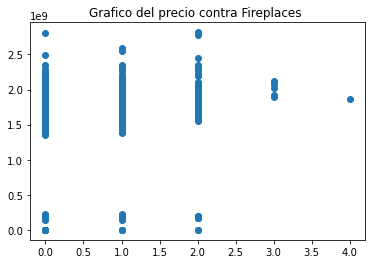

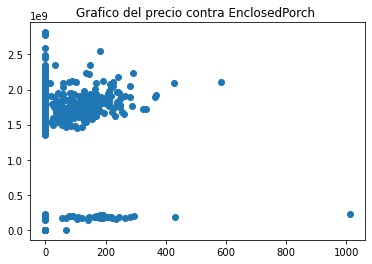

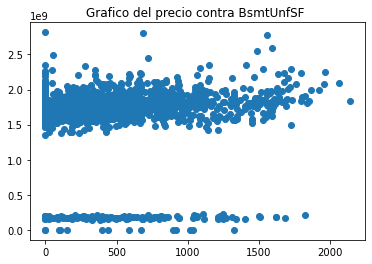

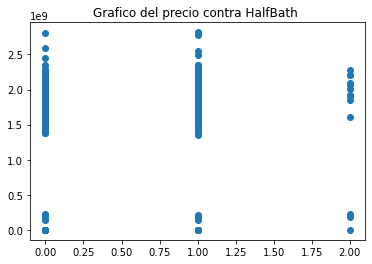

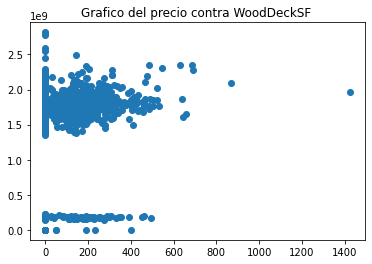

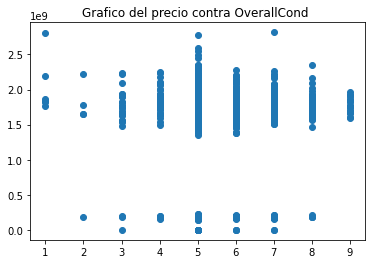

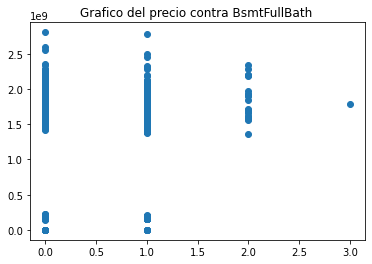

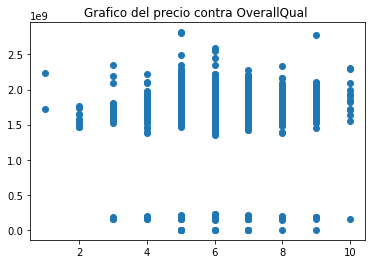

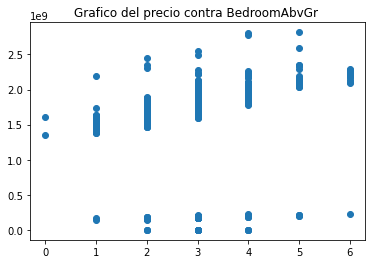

In [23]:
for i in numericas: 
    plt.title("Grafico del precio contra {} ".format(i))
    plt.scatter(data[i], data['SalePrice'])
    plt.show()

<ipython-input-24-c3c6da8b5357>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(1,1, figsize = (16, 5))


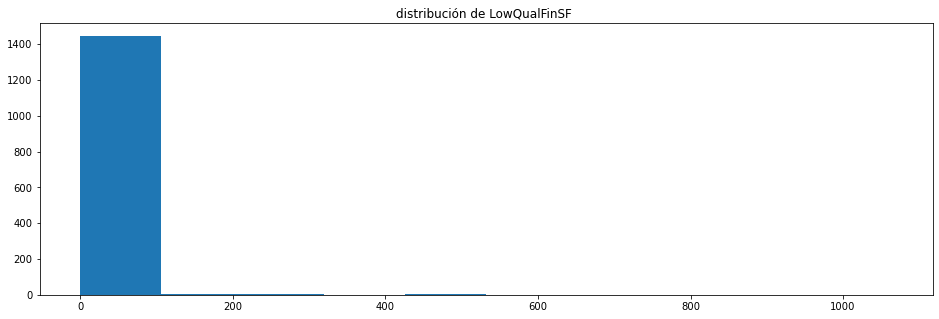

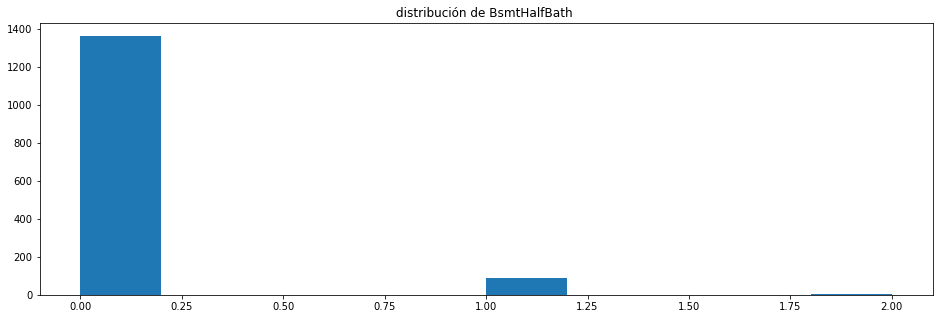

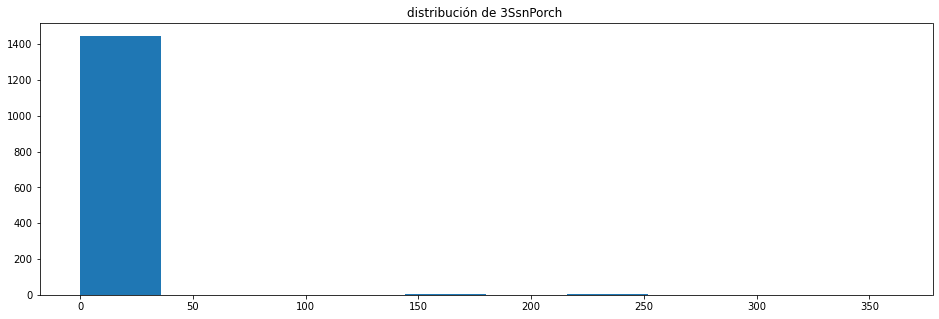

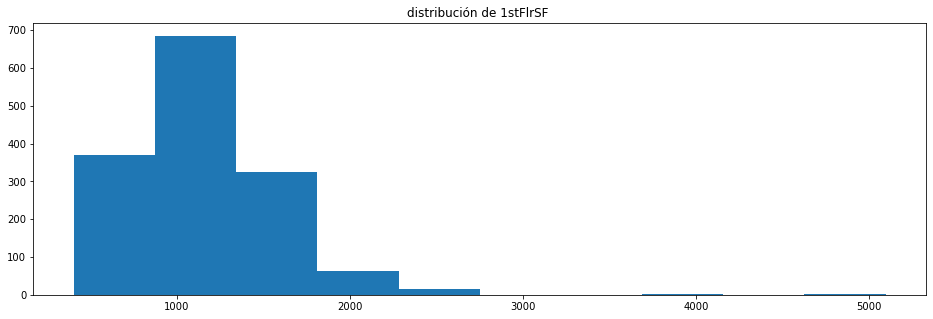

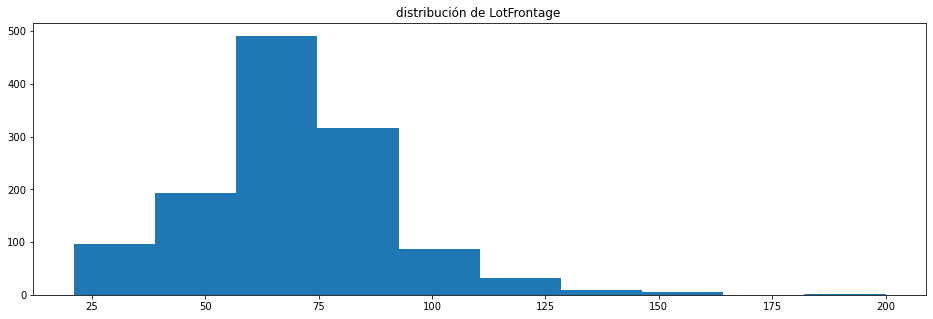

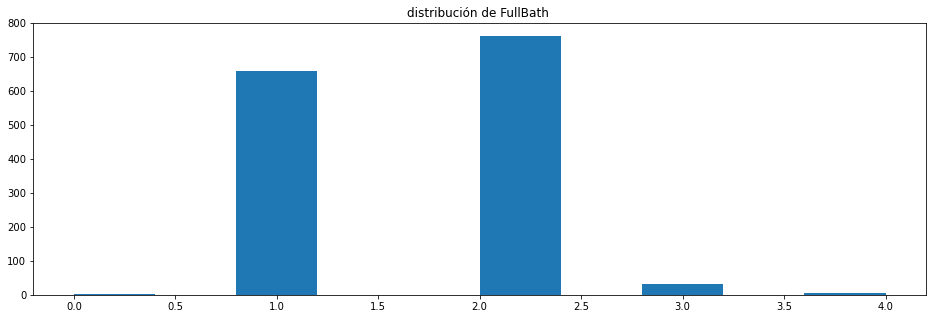

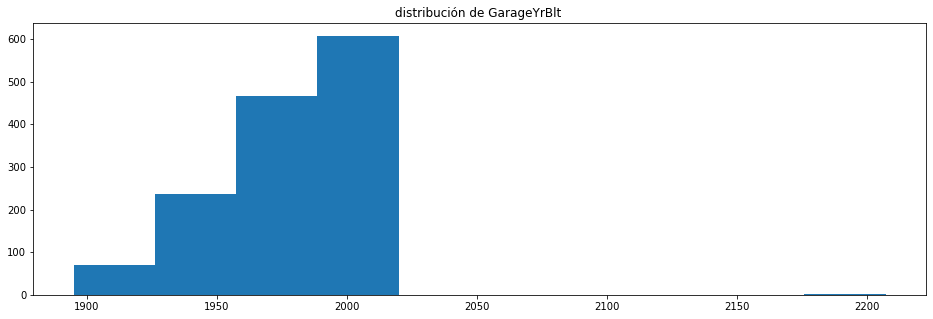

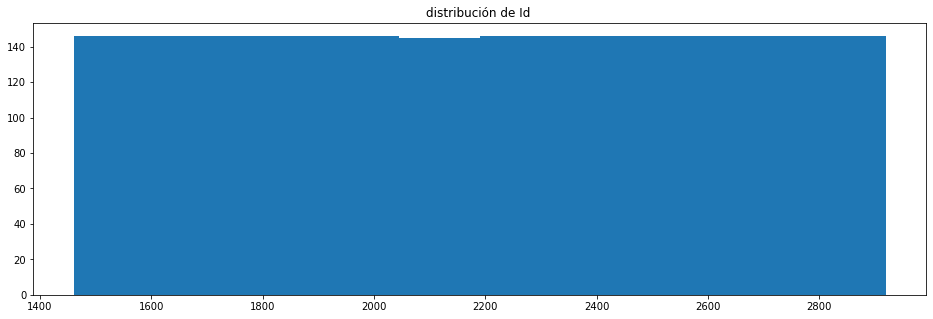

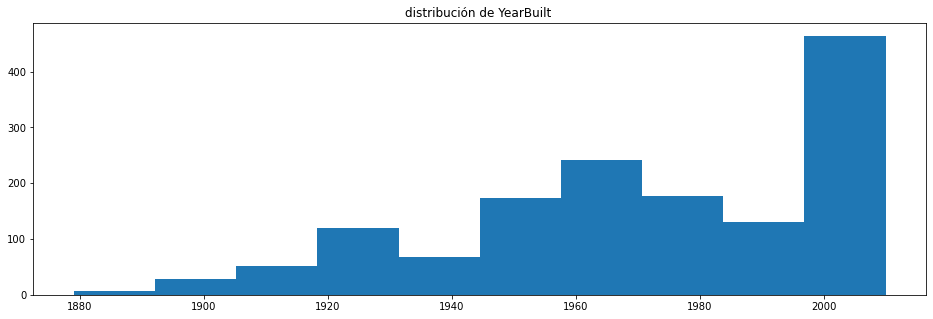

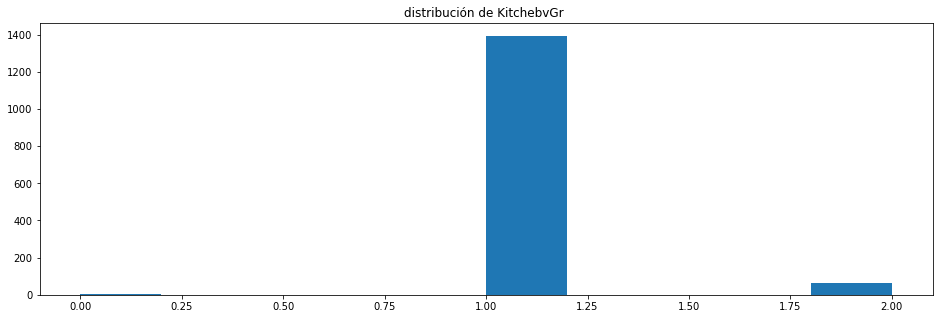

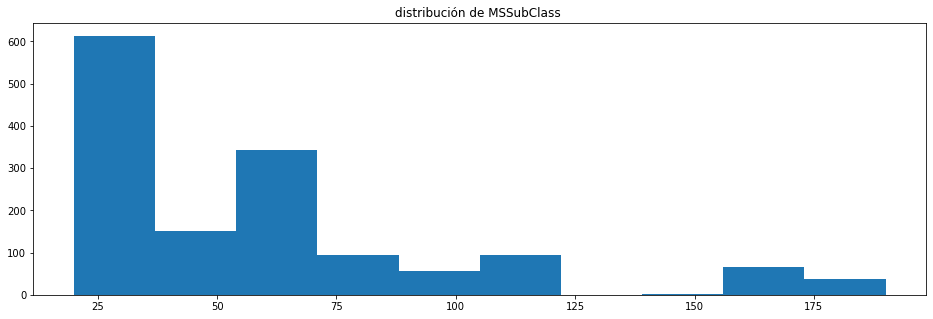

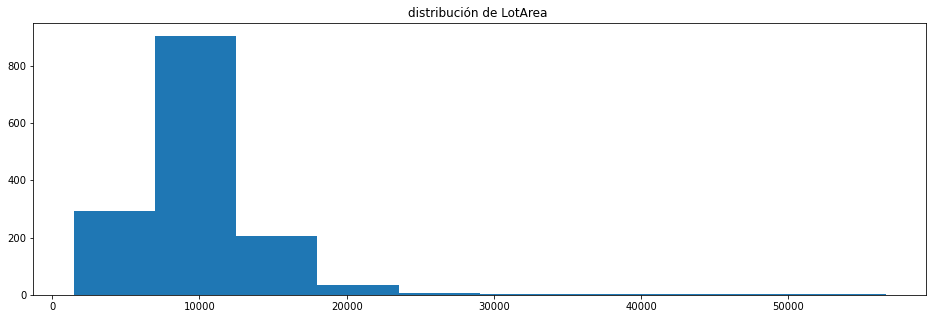

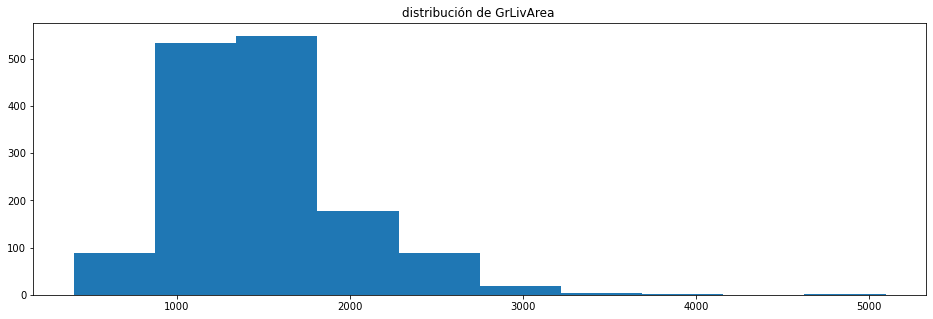

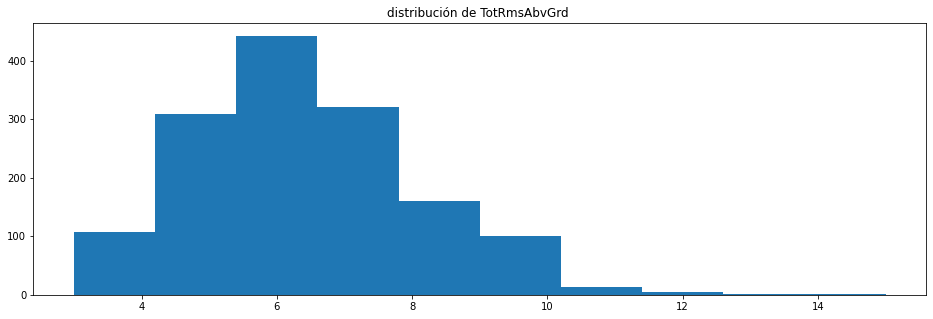

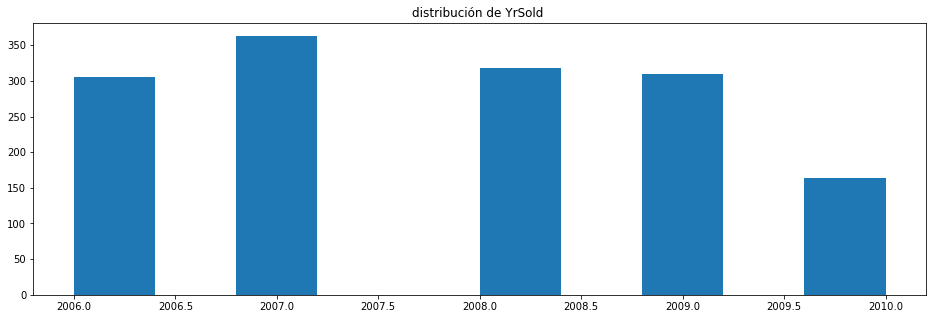

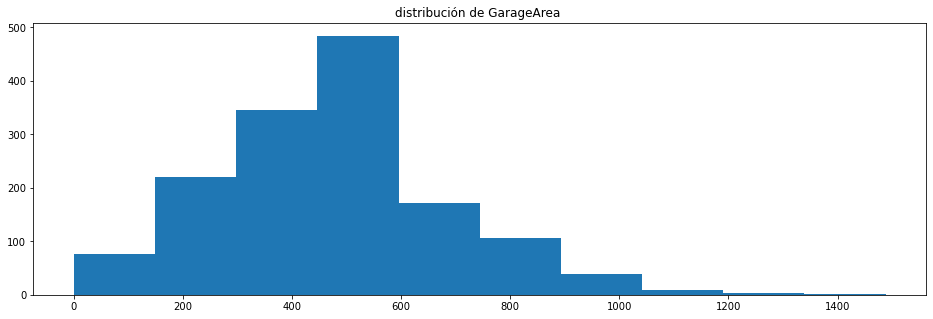

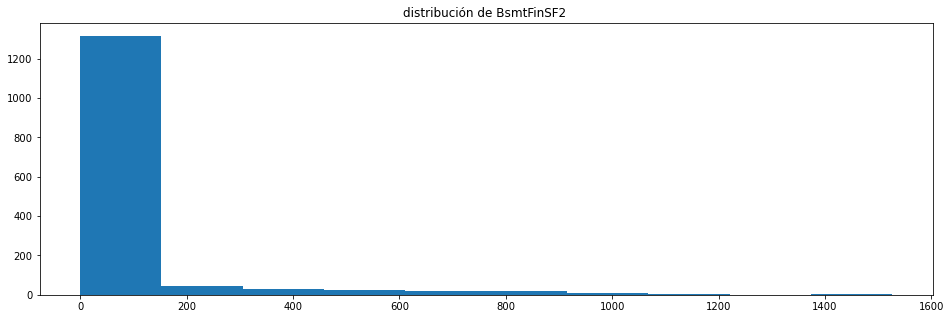

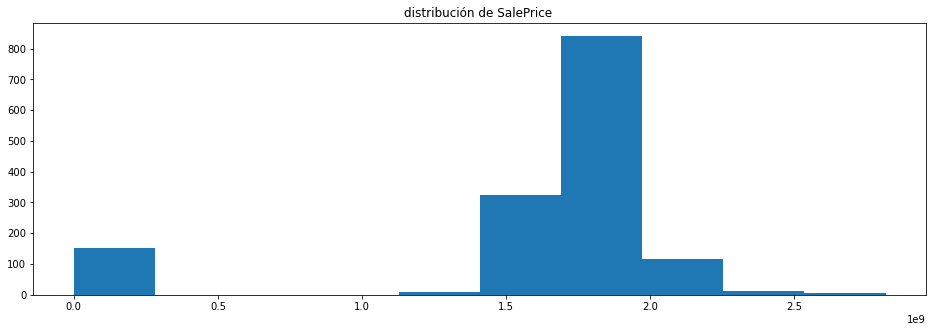

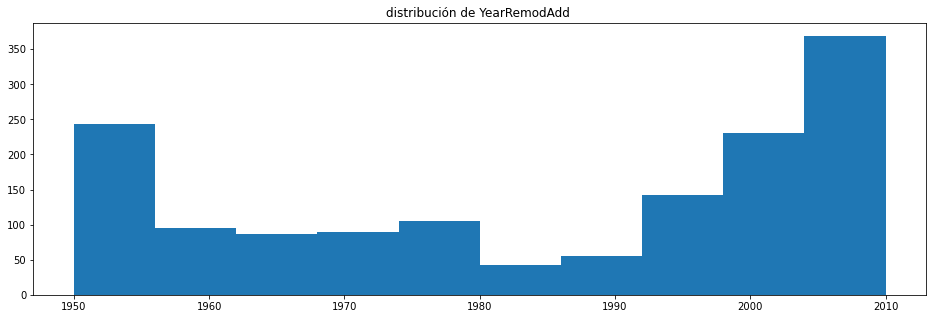

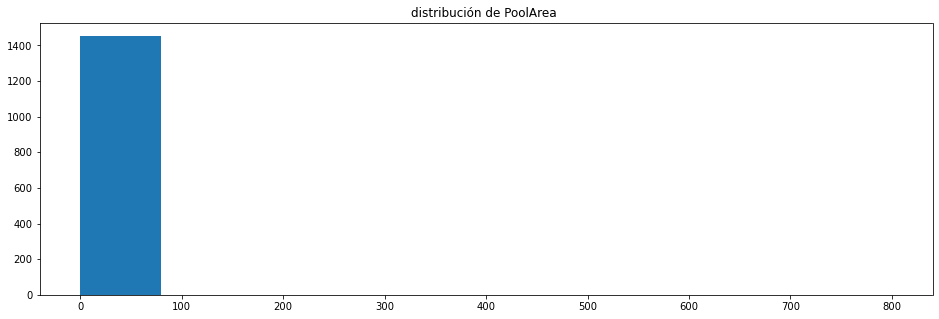

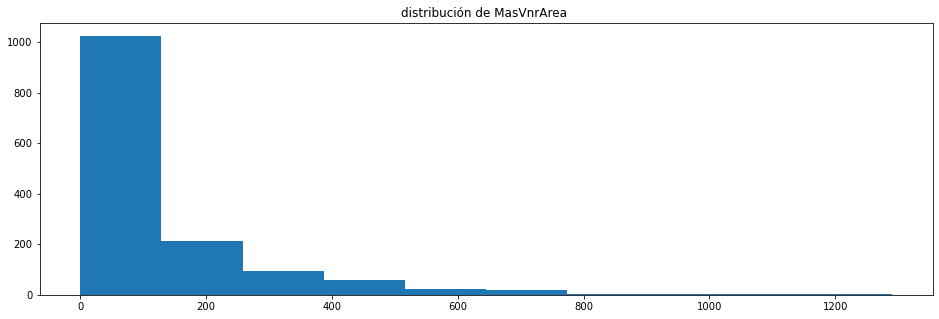

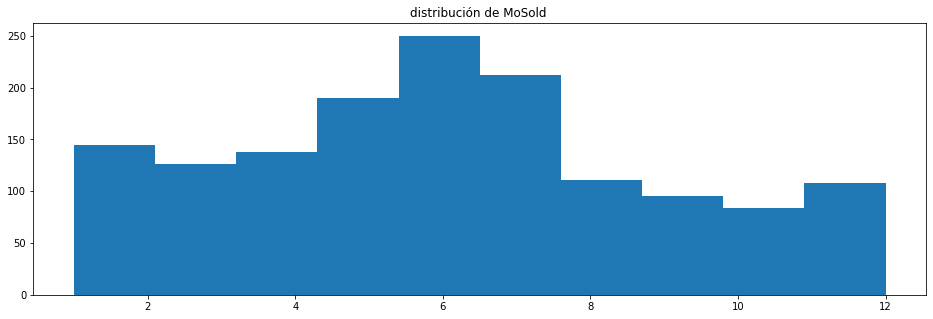

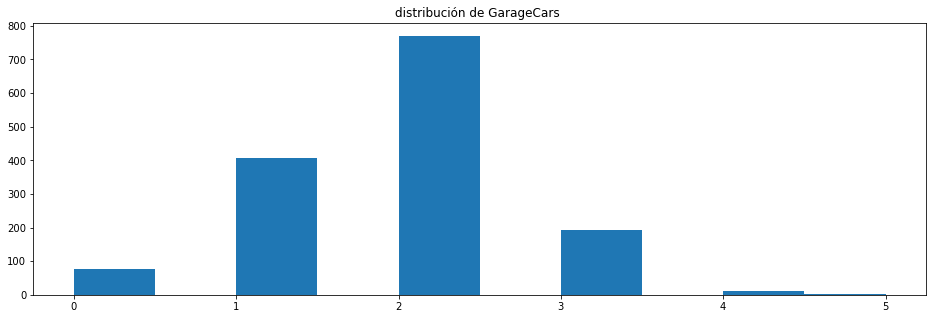

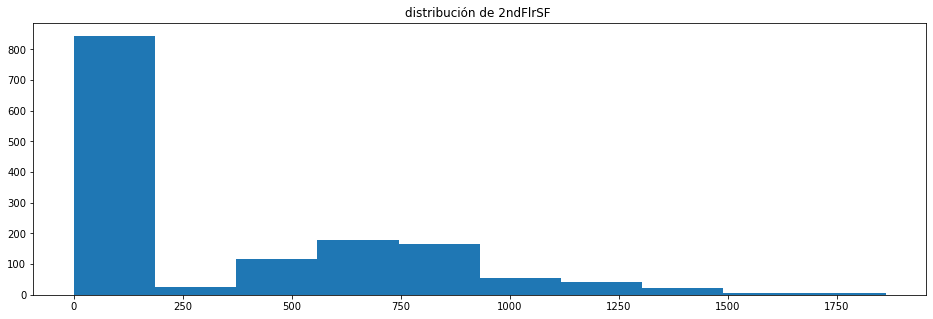

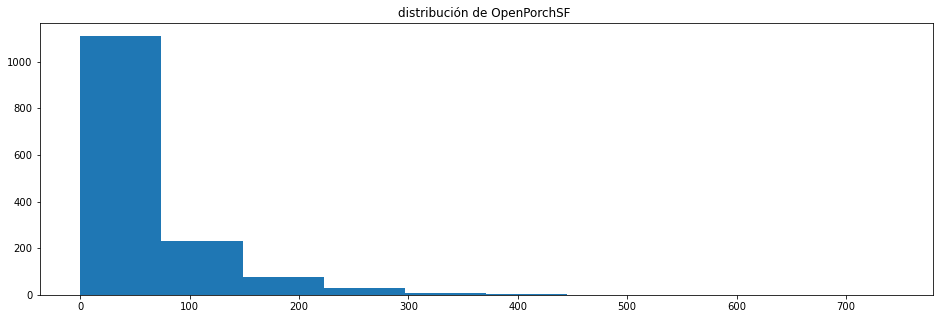

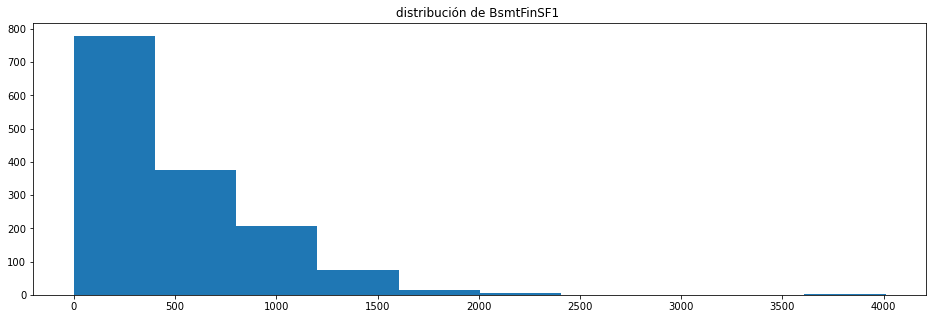

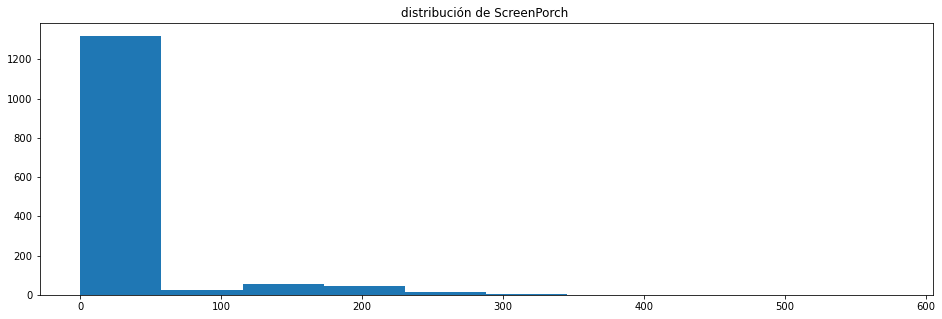

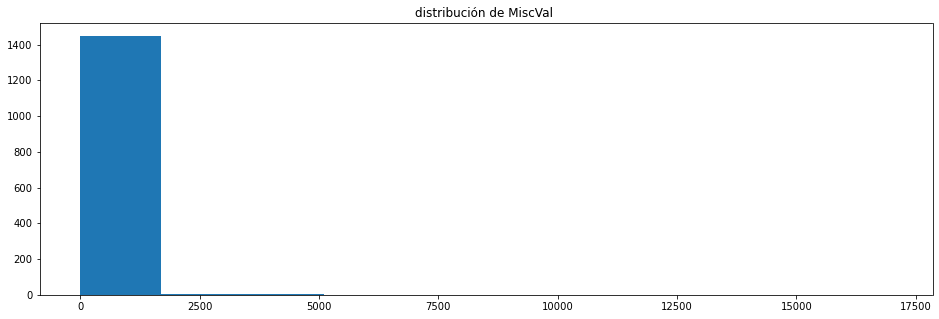

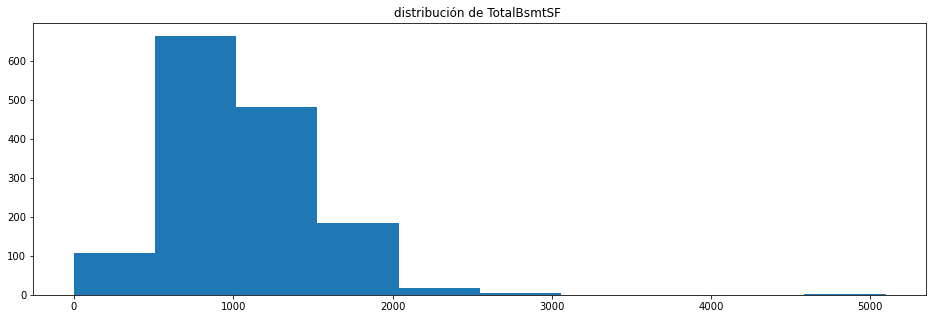

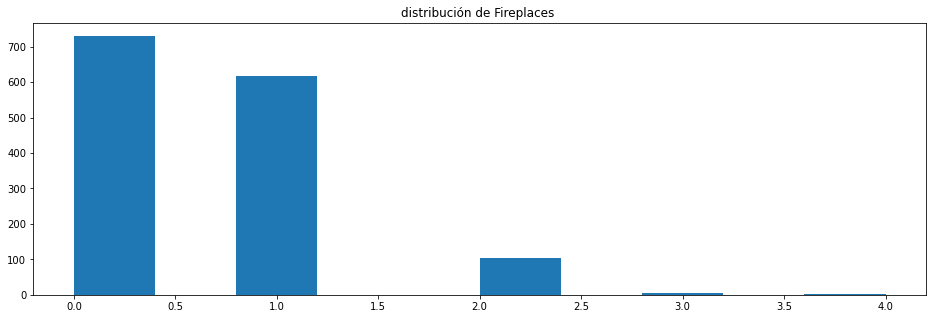

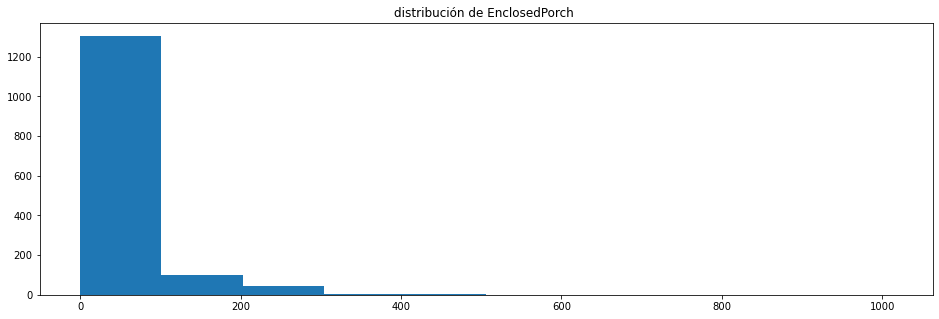

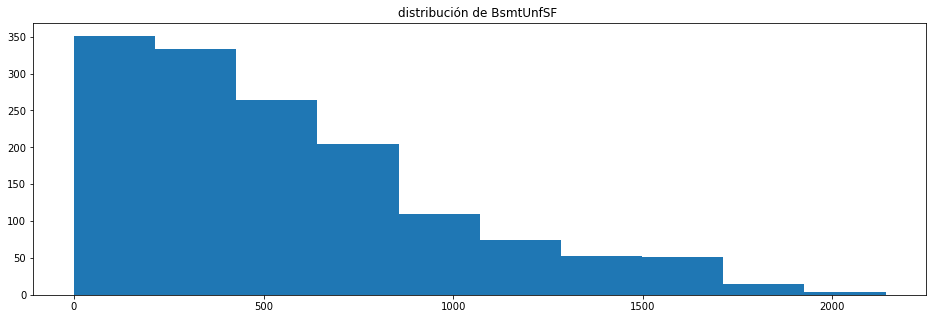

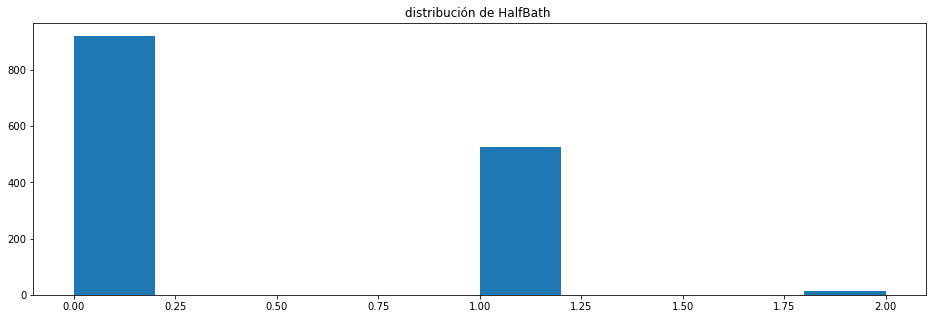

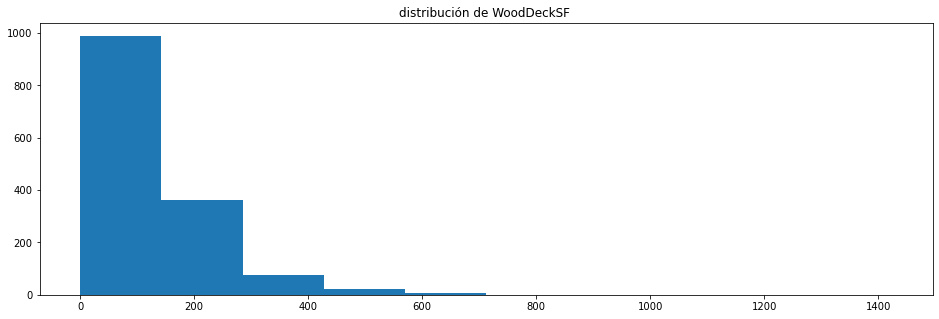

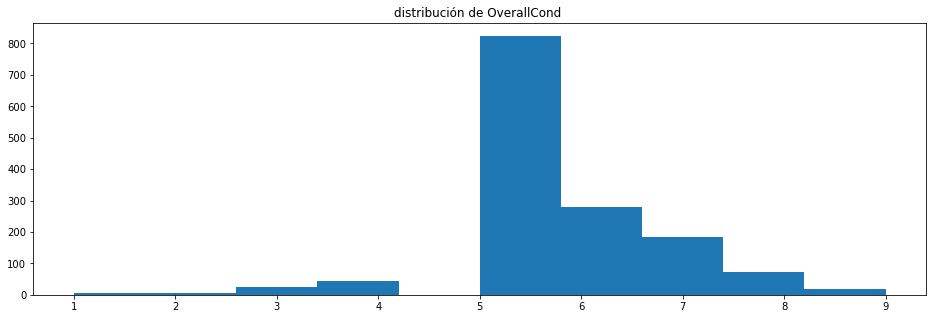

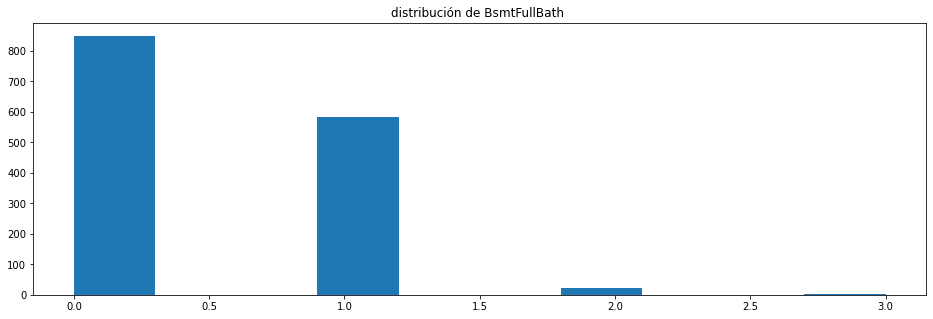

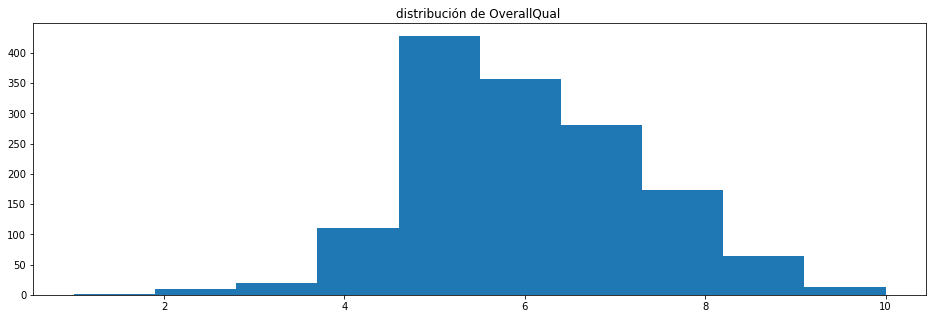

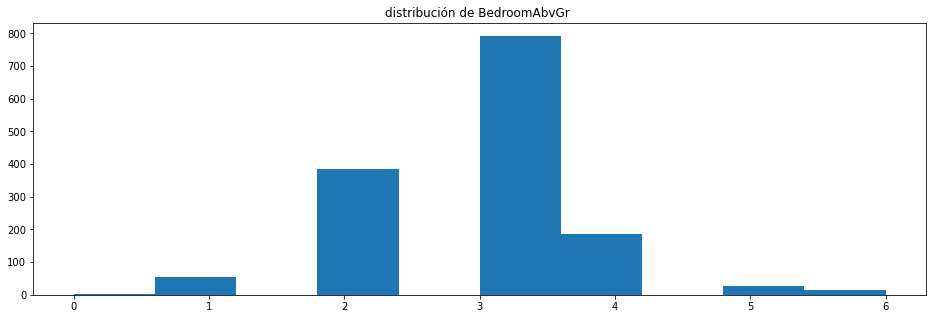

In [24]:
for i in numericas:
    plt.subplots(1,1, figsize = (16, 5))
    plt.title("distribución de {} ".format(i))
    plt.hist(data[i])

In [25]:
data[numericas].describe()

,LowQualFinSF,BsmtHalfBath,3SsnPorch,1stFlrSF,LotFrontage,FullBath,GarageYrBlt,Id,YearBuilt,KitchebvGr,...,TotalBsmtSF,Fireplaces,EnclosedPorch,BsmtUnfSF,HalfBath,WoodDeckSF,OverallCond,BsmtFullBath,OverallQual,BedroomAbvGr
count,1459.000000,1457.000000,1459.000000,1459.000000,1232.000000,1459.000000,1381.000000,1459.000000,1459.000000,1459.000000,...,1458.000000,1459.00000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1457.000000,1459.000000,1459.000000
mean,3.543523,0.065202,1.794380,1156.534613,68.580357,1.570939,1977.721217,2190.000000,1971.357779,1.042495,...,1046.117970,0.58122,24.243317,554.294925,0.377656,93.174777,5.553804,0.434454,6.078821,2.854010
std,44.043251,0.252468,20.207842,398.165820,22.376841,0.555190,26.431175,421.321334,30.390071,0.208472,...,442.898624,0.64742,67.227765,437.260486,0.503017,127.744882,1.113740,0.530648,1.436812,0.829788
min,0.000000,0.000000,0.000000,407.000000,21.000000,0.000000,1895.000000,1461.000000,1879.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,873.500000,58.000000,1.000000,1959.000000,1825.500000,1953.000000,1.000000,...,784.000000,0.00000,0.000000,219.250000,0.000000,0.000000,5.000000,0.000000,5.000000,2.000000
50%,0.000000,0.000000,0.000000,1079.000000,67.000000,2.000000,1979.000000,2190.000000,1973.000000,1.000000,...,988.000000,0.00000,0.000000,460.000000,0.000000,0.000000,5.000000,0.000000,6.000000,3.000000
75%,0.000000,0.000000,0.000000,1382.500000,80.000000,2.000000,2002.000000,2554.500000,2001.000000,1.000000,...,1305.000000,1.00000,0.000000,797.750000,1.000000,168.000000,6.000000,1.000000,7.000000,3.000000
max,1064.000000,2.000000,360.000000,5095.000000,200.000000,4.000000,2207.000000,2919.000000,2010.000000,2.000000,...,5095.000000,4.00000,1012.000000,2140.000000,2.000000,1424.000000,9.000000,3.000000,10.000000,6.000000


2. Variables de tiempo

In [26]:
fechas = ['MoSold','YearBuilt','YearRemodAdd','YrSold', 'GarageYrBlt']

for var in fechas:
    print(var, data[var].unique())
    print()

MoSold [ 6  3  1  4  5  2  7 10  8 11  9 12]

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]

YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]

YrSold [2010 2009 2008 2007 2006]

GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1

vamos a ver como afecta al tiempo en el precio de venta mediano. (usamos la mediana ya que para una muestra asimetrica representa mejor el centro)

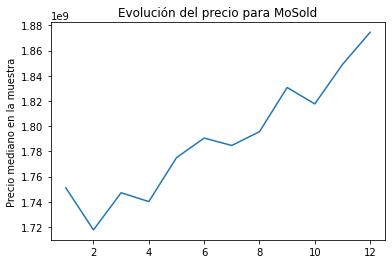

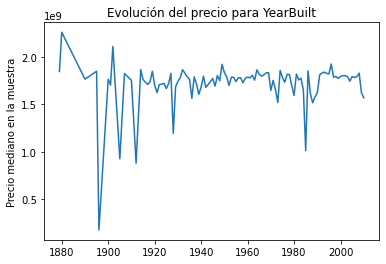

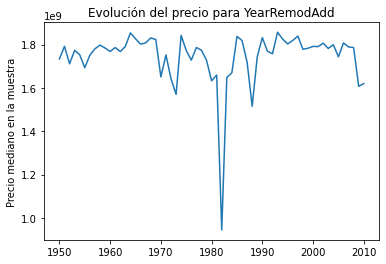

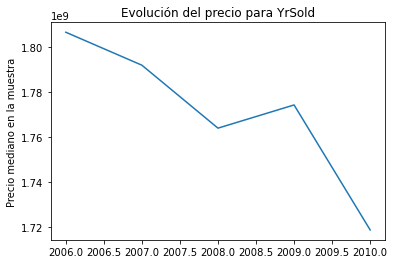

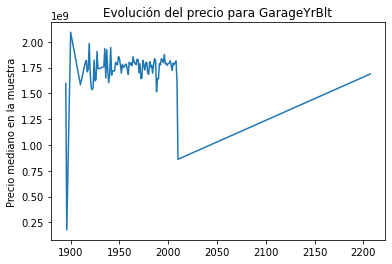

In [27]:
for i in fechas: 
    plt.plot(data.groupby(i)['SalePrice'].median())
    plt.ylabel('Precio mediano en la muestra')
    plt.title('Evolución del precio para {}'.format(i))
    plt.show()

3. variables categoricas

In [28]:
data[categoricas].nunique()

Condition2        5
GarageCond        5
BsmtFinType1      6
Utilities         1
HouseStyle        7
Neighborhood     25
RoofStyle         6
GarageQual        4
ExterCond         5
BldgType          5
BsmtFinType2      6
GarageFinish      3
Heating           4
Exterior1st      13
Condition1        9
SaleCondition     6
FireplaceQu       5
BsmtCond          4
PavedDrive        3
BsmtExposure      4
Alley             2
Fence             4
MasVnrType        4
Exterior2nd      15
RoofMatl          4
Electrical        4
HeatingQC         5
BsmtQual          4
Foundation        6
CentralAir        2
LotShape          4
MiscFeature       3
ExterQual         4
Functiol          7
LandContour       4
LandSlope         3
PoolQC            2
SaleType          9
KitchenQual       4
MSZoning          5
LotConfig         5
Street            2
GarageType        6
dtype: int64

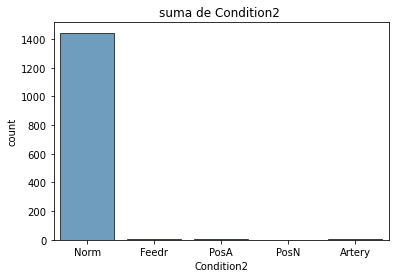

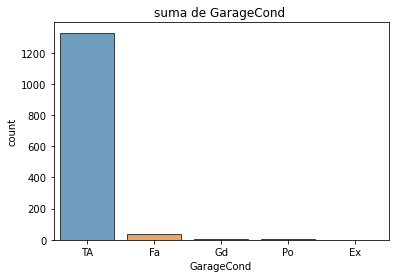

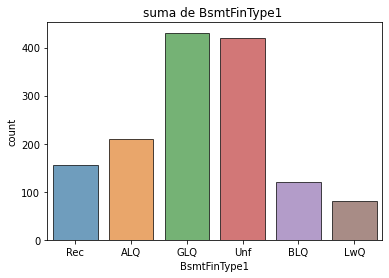

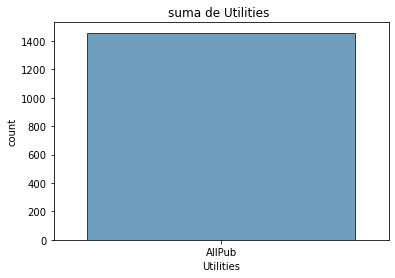

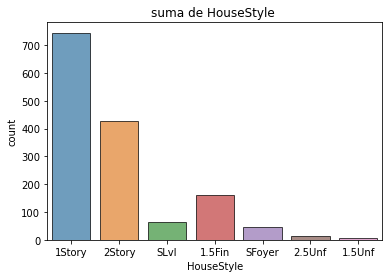

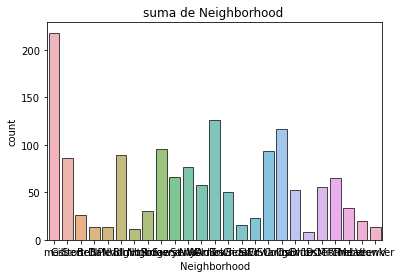

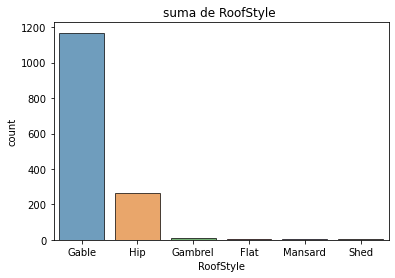

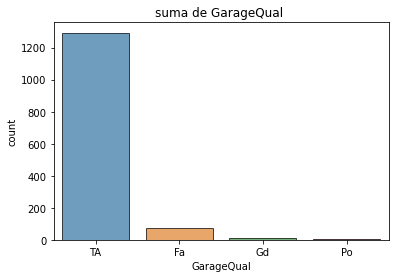

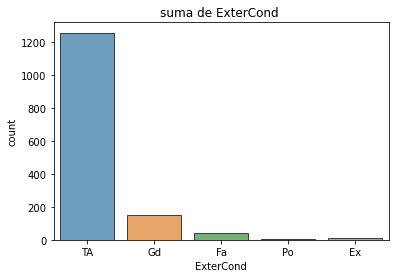

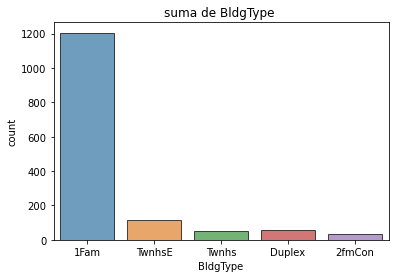

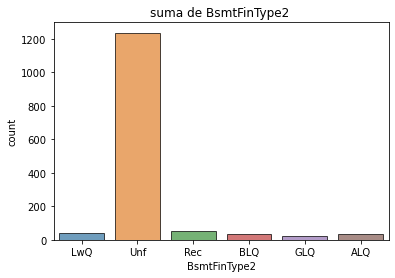

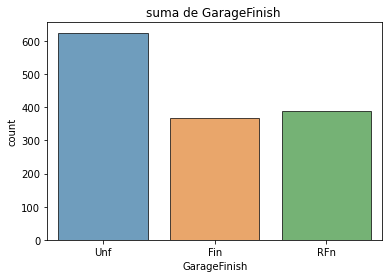

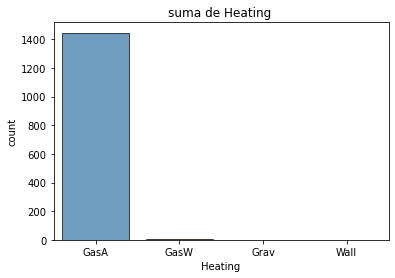

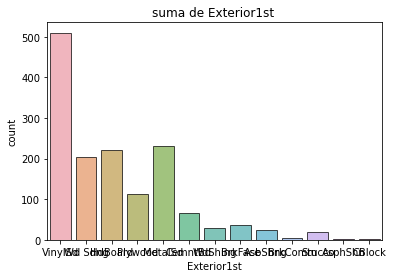

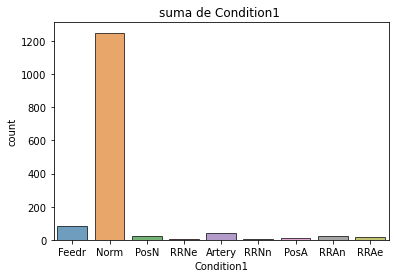

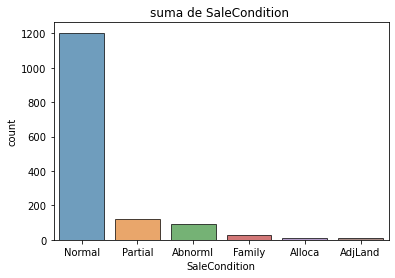

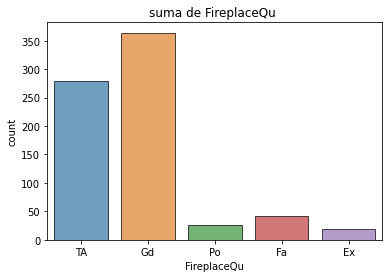

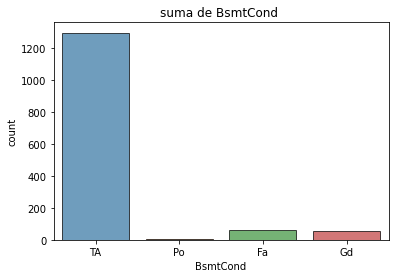

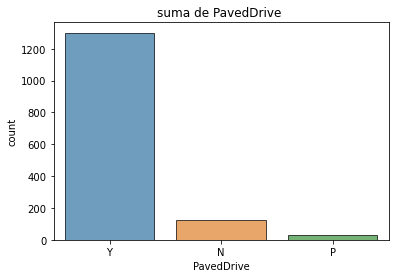

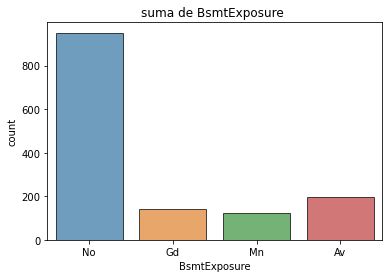

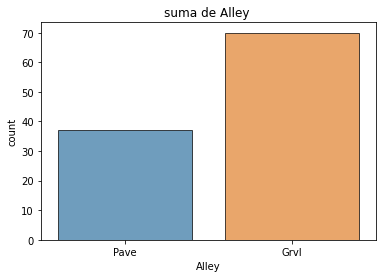

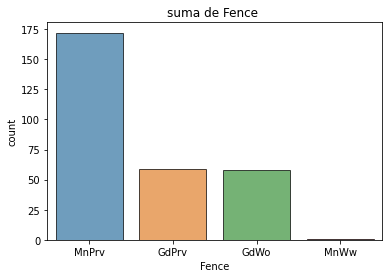

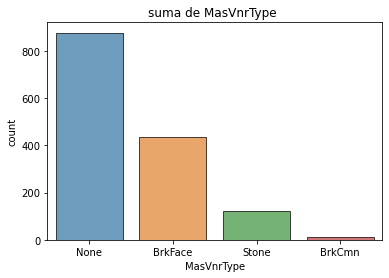

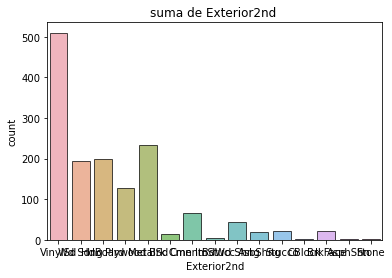

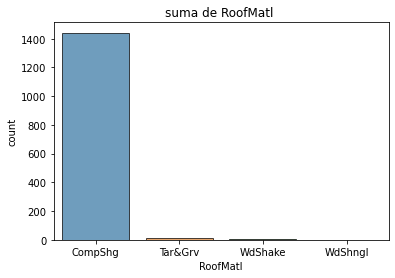

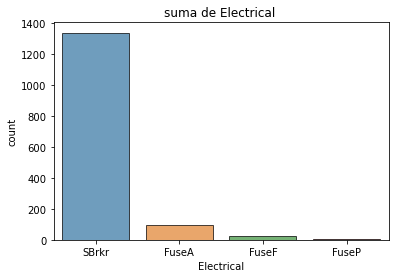

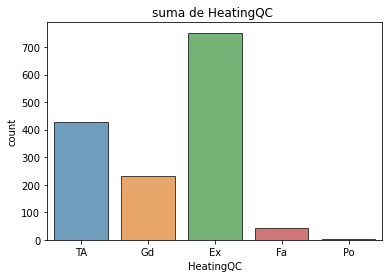

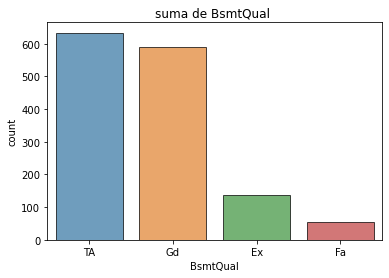

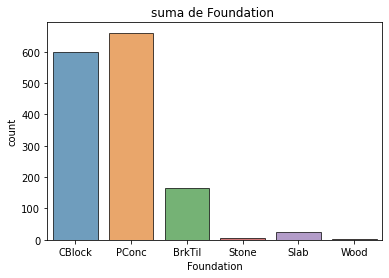

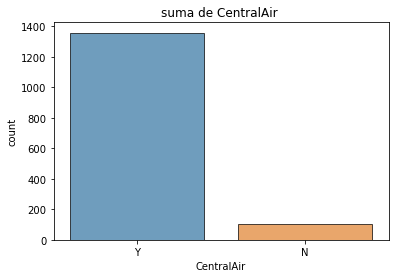

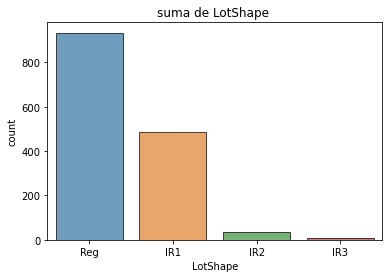

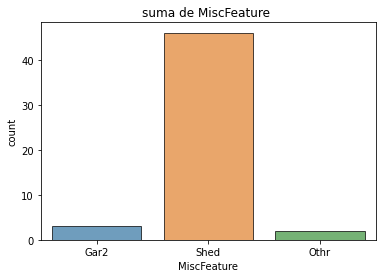

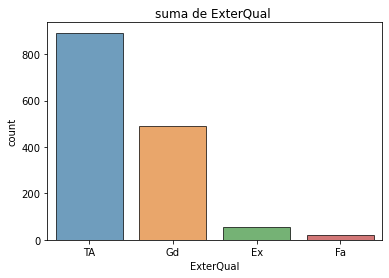

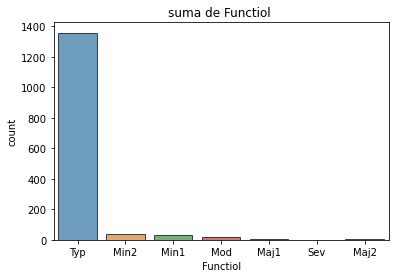

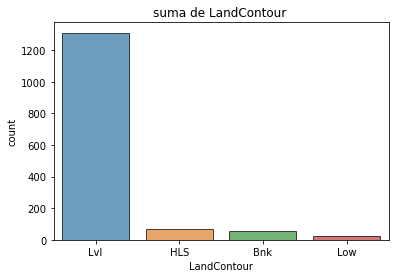

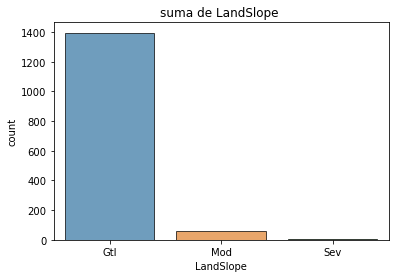

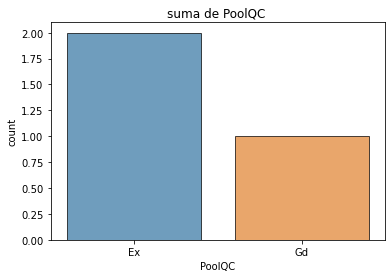

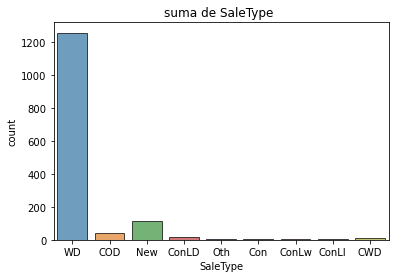

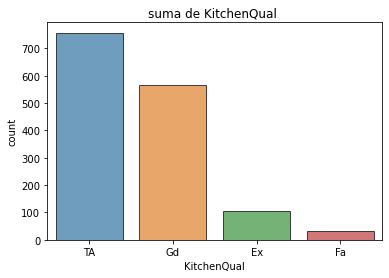

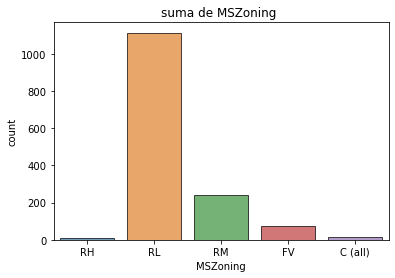

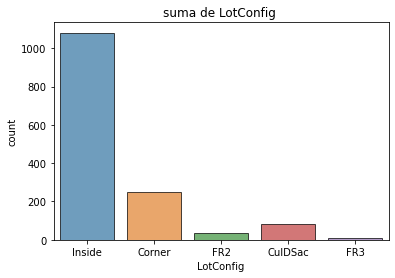

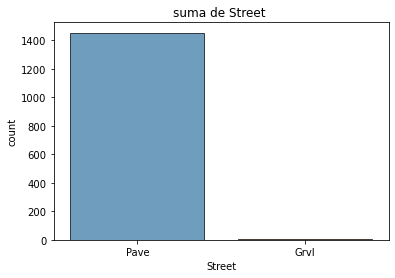

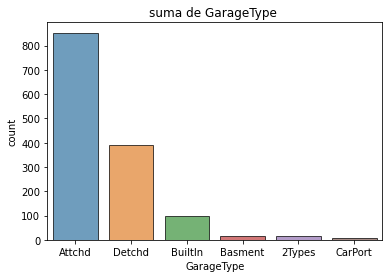

In [29]:
for i in categoricas:
    sns.countplot(x= i, edgecolor='black', alpha=0.7, data = data)
    plt.title("suma de {} ".format(i))
    plt.show()
    

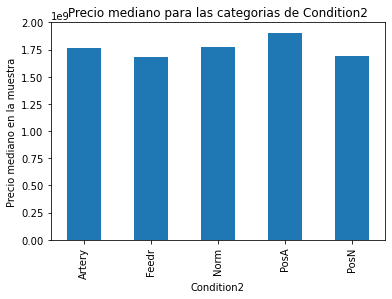

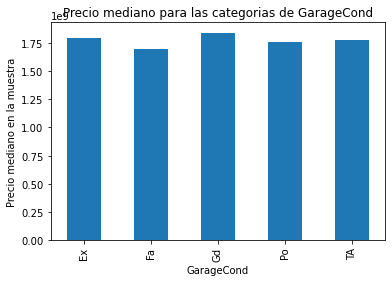

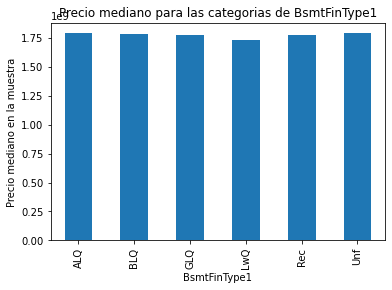

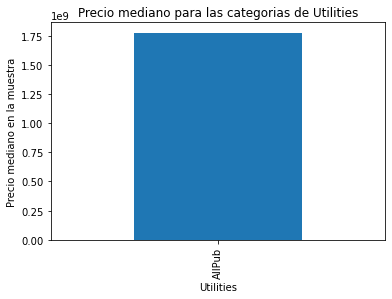

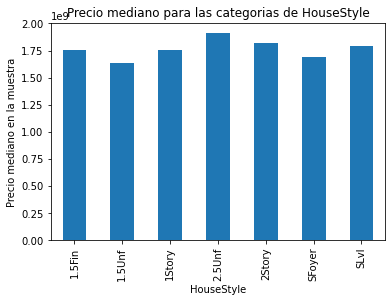

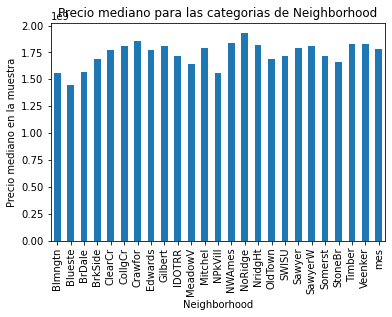

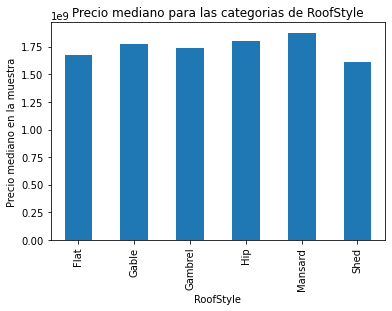

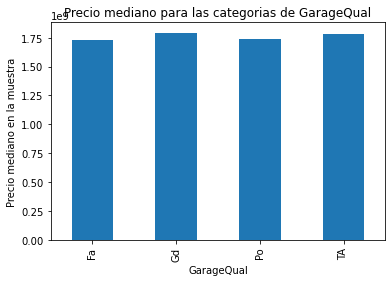

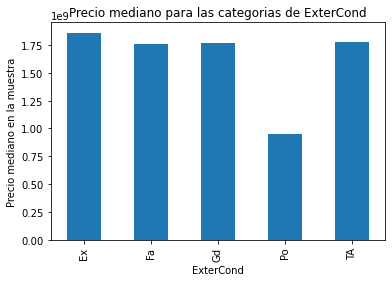

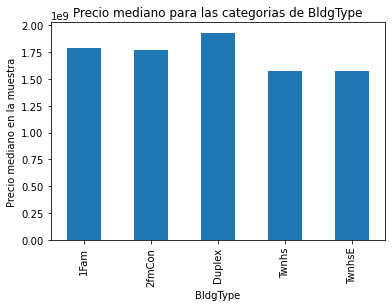

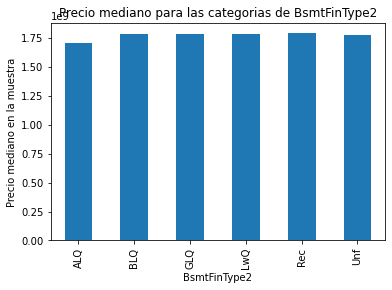

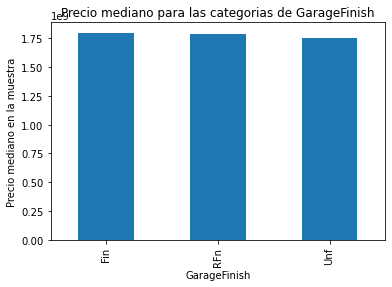

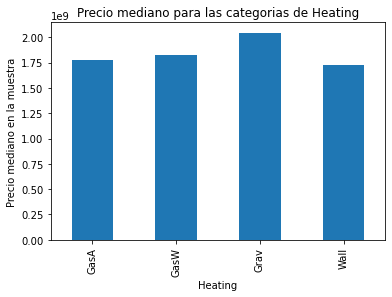

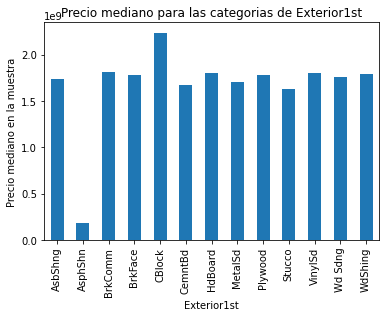

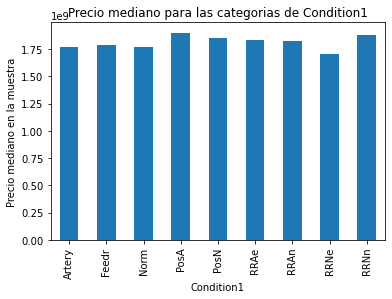

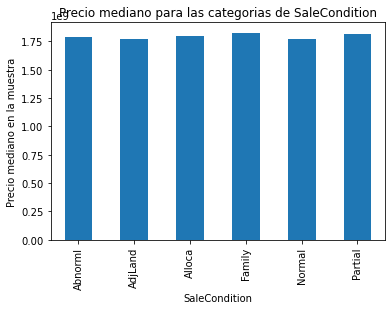

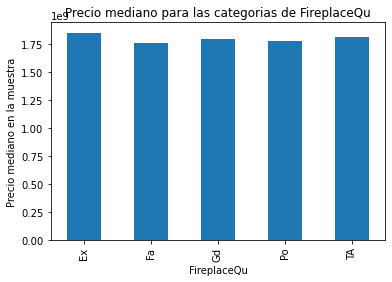

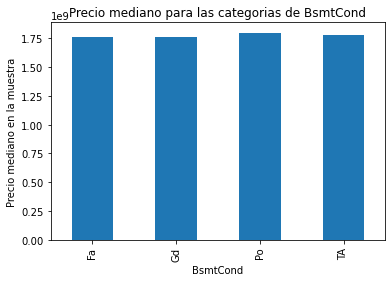

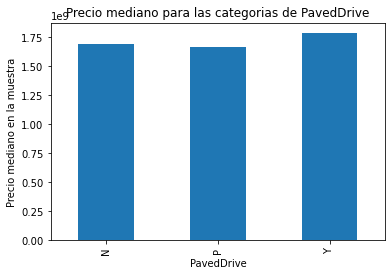

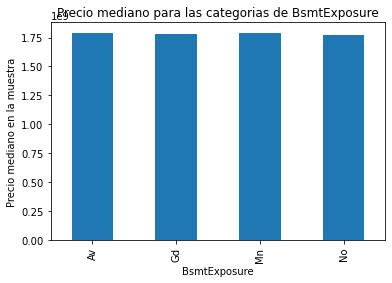

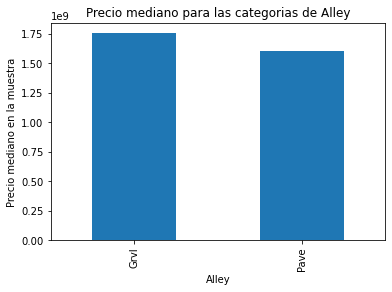

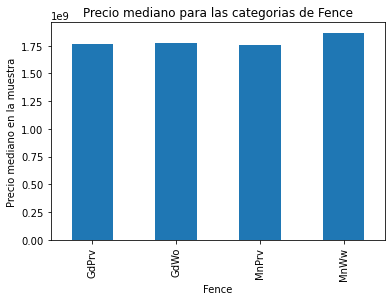

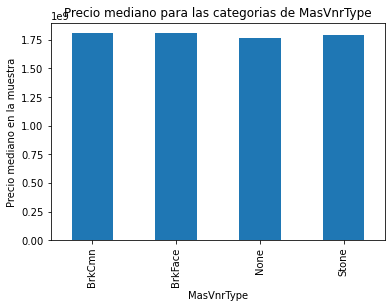

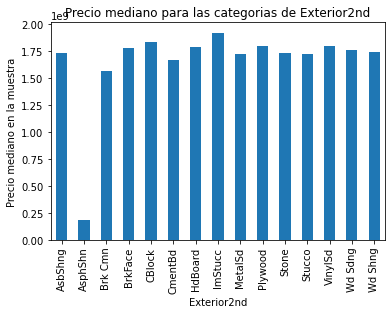

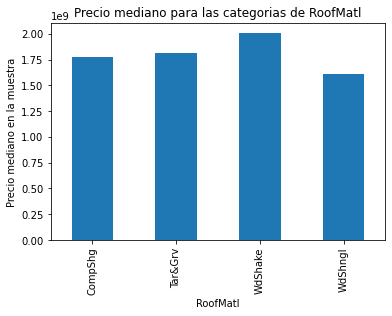

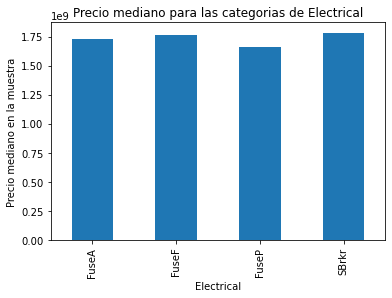

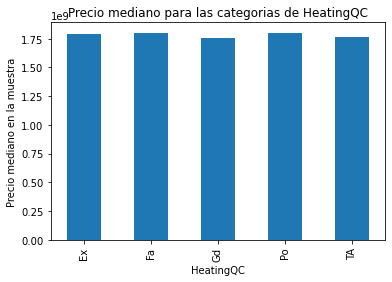

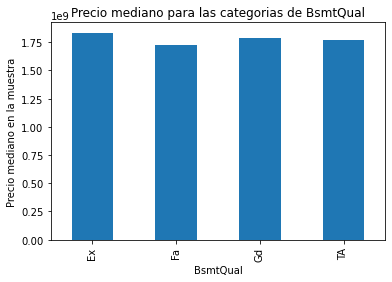

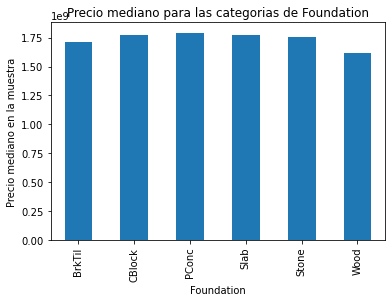

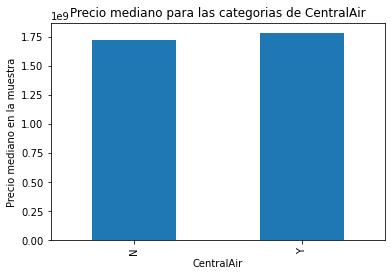

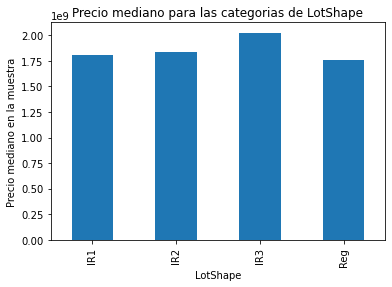

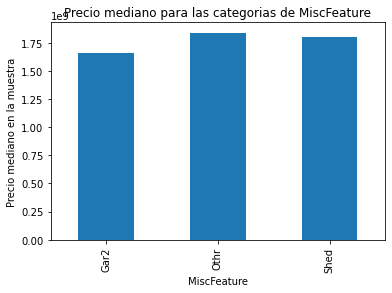

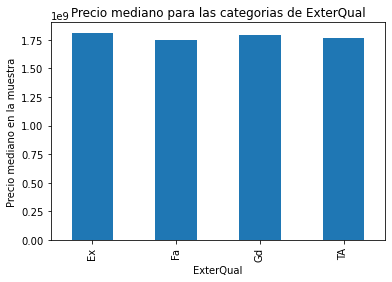

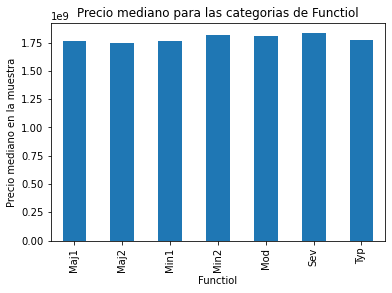

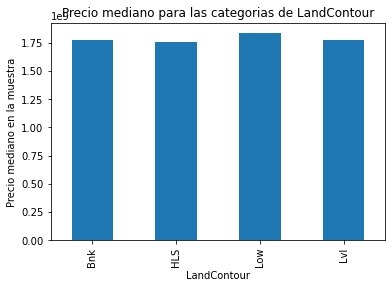

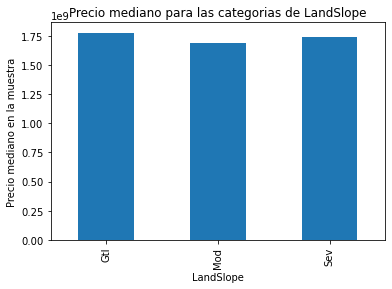

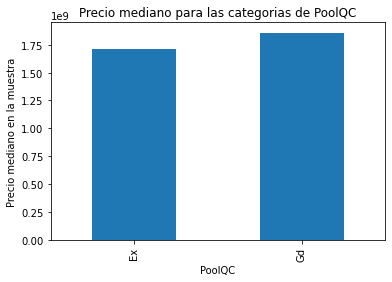

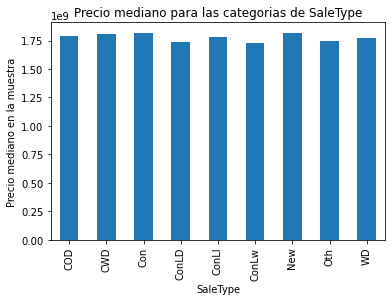

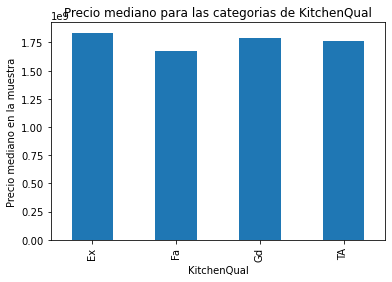

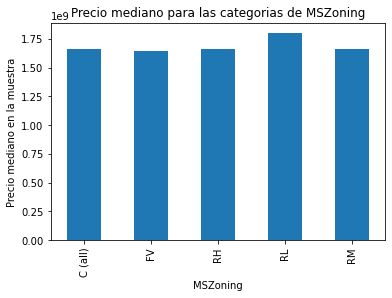

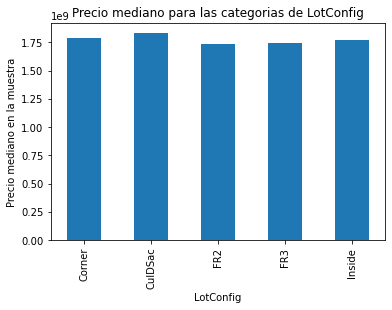

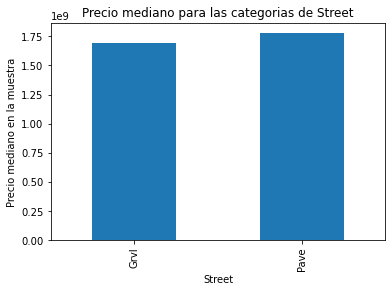

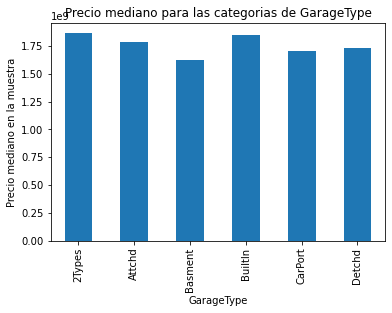

In [30]:
for i in categoricas: 
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.ylabel('Precio mediano en la muestra')
    plt.title('Precio mediano para las categorias de {}'.format(i))
    plt.show()

### Preprocesamiento de los datos

En este caso tambien transformaremos las fechas pues no es una serie temporal y por tanto se usan como una "clase".

1. Rellenamos los Nan. 
Como no estamos prestando especial atencion a imputar missing values vamos a usar el valor mas frecuente.

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
data_completo = pd.DataFrame(imputer.fit_transform(data))
data_completo.columns = data.columns

In [32]:
binarias = set(categoricas + fechas)
binarias = list(binarias)

In [33]:
numericas = set(numericas) - set(fechas)
numericas = list(numericas)

2. Scaling variables numericas

In [34]:
scaler = StandardScaler()

In [35]:
data_completo[numericas] = scaler.fit_transform(data_completo[numericas])

3. Realizamos One hot encoding para pasar las categoricas a binarias

In [36]:
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(data_completo[binarias])
data_ohe = pd.DataFrame(ohe.transform(data_completo[binarias]))
data_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names())

In [37]:
data_final = pd.concat((data_completo[numericas].reset_index(), data_ohe), axis=1)

In [38]:
col = ['index', 'Id']
data_final = data_final.drop(col, axis =1)
data_final

,LowQualFinSF,BsmtHalfBath,3SsnPorch,1stFlrSF,FullBath,KitchebvGr,MSSubClass,LotArea,GrLivArea,TotRmsAbvGrd,...,"(x45_FR3,)","(x45_Inside,)","(x46_Grvl,)","(x46_Pave,)","(x47_2Types,)","(x47_Attchd,)","(x47_Basment,)","(x47_BuiltIn,)","(x47_CarPort,)","(x47_Detchd,)"
0,-0.0804831,-0.25816,-0.0888267,-0.654561,-1.02872,-0.20391,-0.874711,0.363929,-1.21559,-0.918335,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.0804831,-0.25816,-0.0888267,0.433298,-1.02872,-0.20391,-0.874711,0.897861,-0.323539,-0.255371,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.0804831,-0.25816,-0.0888267,-0.574165,0.773083,-0.20391,0.0613509,0.809646,0.294508,-0.255371,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.0804831,-0.25816,-0.0888267,-0.57919,0.773083,-0.20391,0.0613509,0.0320639,0.243004,0.407593,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.0804831,-0.25816,-0.0888267,0.310192,0.773083,-0.20391,1.46544,-0.971808,-0.424487,-0.918335,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.0804831,-0.25816,-0.0888267,-1.53389,-1.02872,-0.20391,2.40151,-1.59133,-0.811797,-0.918335,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1455,-0.0804831,-0.25816,-0.0888267,-1.53389,-1.02872,-0.20391,2.40151,-1.59981,-0.811797,-0.255371,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.0804831,-0.25816,-0.0888267,0.169499,-1.02872,-0.20391,-0.874711,2.05515,-0.539856,0.407593,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,-0.0804831,3.70663,-0.0888267,-0.468645,-1.02872,-0.20391,0.646389,0.125527,-1.06314,-0.255371,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
data_final.columns[data_final.isnull().sum()>0]

Index([], dtype='object')

### Selección de variables

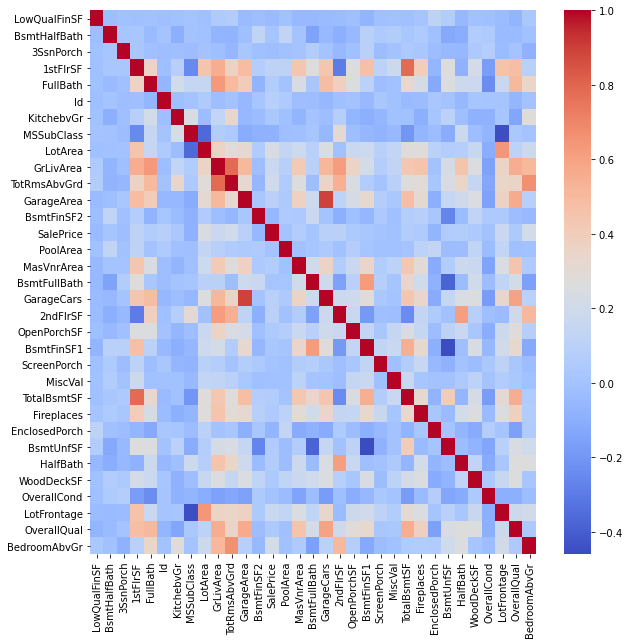

In [40]:
plt.figure(figsize=[10,10])
sns.heatmap(data[numericas].corr(), cmap = 'coolwarm')

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data_final,
                                                    data_final['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=0) 

print('set de entrenamiento: ', x_train.shape)
print('set de prueba: ', x_test.shape)

set de entrenamiento:  (1167, 547)
set de prueba:  (292, 547)


In [42]:
x_train = x_train.drop('SalePrice', axis = 1)
x_test = x_test.drop('SalePrice', axis = 1)

In [43]:
seleccion = SelectFromModel(estimator=LinearRegression())
seleccion.fit(x_train,y_train)

SelectFromModel(estimator=LinearRegression())

In [44]:
var_selec = x_train.columns[(seleccion.get_support())]
print('variables seleccionadas ', len(var_selec))

variables seleccionadas  155


### Modelo 

In [45]:
x_train = x_train[var_selec]
x_test = x_test[var_selec]